# Trabajo Especial 2024

Alumno: Valentin Fuentes

# Visualización de datos con gráficos simples

En esta notebook recorremos distintos tipos básicos de grafícos que pueden utilizarse en el análisis de datos, con aplicaciones prácticas. Nos centraremos no sólo el código para generarlos, sino también en algunos pequeños trucos para lograr gráficos más legibles.

Es importante recordar que, a pesar de que esta notebook utiliza los datos para ejemplificar los gráficos, en la aplicación real de la ciencia de datos ocurre lo contrario. Debemos pensar primero en la pregunta a responder, y luego diseñar la visualización. Esto incluye:

1. Encontrar el gráfico adecuado para los datos
2. Agrupar los datos de manera que resalten el patrón que ayuda a responder la pregunta inicial.
3. Encontrar los encodings visuales más efectivos para comunicar este patrón (aunque no vamos a hablar tanto de eso en esta notebook).

## 1. Tablas

Las tablas son muchas veces dejadas de lado en las visualizaciones, pero son una de las formas de representación más poderosa. Usualmente partimos de una tabla para generar visualizaciones más complejas, pero esto no significa que generar buenas tablas no sea útil en el proceso de comunicación.

* Muestran cantidades exactas
* Representan cualquier tipo de datos
* Son de acceso universal
* Son fáciles de crear
* Permiten comprar muchas variables

Lo primero que tenemos que hacer para comenzar a enteder el dataset es ver los valores como una tabla, para indentificar la información en cada una de las columnas.

Empecemos levantando una tabla creada en excel

# ¿Cómo leer datos desde pandas?

En esta primera notebook, aprendemos cómo cargar un conjunto de datos utilizando pandas y cómo ver su contenido.

In [302]:
import io
import pandas
import seaborn

print(seaborn.__version__)
BLUE = '#35A7FF'
RED = '#FF5964'
GREEN = '#6BF178'
YELLOW = '#FFE74C'
# Con esto hacemos los gráficos más grandes, adecuados para las presentaciones.
#seaborn.set_context(context='talk', font_scale=1.2)

0.13.2


Si cargan el archivo desde su disco duro a el temporario de colab, pueden correr la siguiente sentencia para armar un dataframe de pandas

In [303]:
#df = pandas.read_excel('/content/Dataset AyVD 2020 (respuestas).xlsx')

Si no hacen eso, pueden levantar el archivo desde su disco en la computadora personal y subirlo al temporario con las siguientes sentencias

In [304]:
from google.colab import files
uploaded = files.upload()

Saving generated_dataset.csv to generated_dataset.csv


Una vez subido el archivo, éste está disponible en la variable `uploaded`, que es un diccionario. Casi siempre, la clave que estamos buscando es el nombre del archivo que acabamos de subir, pero podría no ser el caso. Para estar seguro, vamos a listar los archivos que se subieron.

In [305]:
print(uploaded.keys())

dict_keys(['generated_dataset.csv'])


In [306]:
df = pandas.read_csv('/content/generated_dataset.csv')

Con esta operación, hemos creado un DataFrame de pandas en base al archivo de respuestas. Un DataFrame no es más que una tabla sobre la cual podemos aplicar un montón de operaciones similares a las de Excel o a las SQL. En esta notebook no pretendemos hacer un tutorial de pandas, el Internet está lleno de ellos, pero sí iremos explicando cómo implementar determinadas operaciones necesarias para el análisis de este conjunto de datos.

Veamos qué tiene adentro el DataFrame `df`.

In [307]:
df[:10]

,Unnamed: 0,gender,age,zodiac_sign,profession,junior_programmer_salary,senior_programmer_salary
0,0,Hombre,17,Cáncer,Profesor,55000,138000
1,1,Hombre,48,Escorpio,Ingeniero,50000,131000
2,2,Hombre,41,Sagitario,Ingeniero,48000,160000
3,3,Hombre,11,Virgo,Ingeniero,58000,123000
4,4,Hombre,57,Aries,Programador,62000,243000
5,5,Hombre,63,Sagitario,Programador,61000,269000
6,6,Hombre,52,Virgo,Físico,41000,155000
7,7,Hombre,32,Picis,Ingeniero,44000,74000
8,8,Prefiero no decirlo,18,Leo,Estudiante,29000,176000
9,9,Hombre,50,Escorpio,Contador,37000,189000


## Variables


Para trabajar más cómodamente, renombraremos las columnas de DataFrame. Tengan cuidado de que el orden de los nombres nuevos se corresponda con el contenido de cada columna.

In [308]:
df.columns = ['timestamp', 'gender', 'age', 'zodiac_sign', 'profession', 'junior_programmer_salary', 'senior_programmer_salary']

También pandas nos permite otras operaciones simples de estadística descriptiva. En la siguiente línea, estamos filtrando las filas que se identifican como *Hombres* y describiendo la distribución de la columna *Cuánto creés que gana por mes un programador (con dos o menos años de experiencia) en la industria argentina?*

In [309]:
# Descripción de la distribución de la variable "Cuánto creés que gana por
#mes un programador (con dos o menos años de experiencia) en la industria argentina?"
# solo en los registros donde "Me identifico" tiene el valor Hombre
df[df.gender == 'Hombre'].junior_programmer_salary.describe()

,junior_programmer_salary
count,61.000000
mean,52786.885246
std,11734.727314
min,27000.000000
25%,44000.000000
50%,50000.000000
75%,62000.000000
max,80000.000000


In [310]:
df[df.gender == 'Hombre'].senior_programmer_salary.describe()

,senior_programmer_salary
count,61.000000
mean,144098.360656
std,40193.575323
min,74000.000000
25%,115000.000000
50%,138000.000000
75%,165000.000000
max,269000.000000


Con un cálculo grosero, quien ganaba 50 mil pesos en el 2020 ahora gana 1 millon cuatrocientos. Si le aumentaron la inflación.


# Tipos de datos



## Tipos de variables aleatorias

En base a la definición de variable aleatoria que vimos en el teórico, podemos hablar de que cada columna de nuestro dataset es un **variable aleatoria**, y que su valor en cada respuesta es una **realización** de dicha variable. Pero, ¿qué tipo tienen esas variables?

Tenemos que distinguir dos conceptos con el mismo nombre y significado similar, pero que no son iguales:
 - **tipo de la variable aleatoria** es el tipo teórico que tienen nuestros datos.
 - **tipo de datos** es un concepto de programación que indica en qué formato se representa la información.




### Rango y valores posibles

Siempre es útil saber qué valores puede tomar una variable para entender qué tipo tiene. Sin embargo, si sospechamos que una variable es continua, no tiene sentido listar todos sus valores posibles. En ese caso, nos conviene mostrar sólo el rango, o tomar una pequeña muestra. Veamos algunos ejemplos:

df.gender.unique()  # Listar todos los valores posibles

In [311]:
df.age.max(), df.age.min()  # Variable numérica

(70, 11)

In [312]:
df.junior_programmer_salary.sample(n=10)  # Tomamos una muestra

,junior_programmer_salary
8,29000
59,33000
52,41000
80,48000
30,61000
13,54000
88,40000
42,67000
27,27000
66,45000


In [313]:
df.profession.unique()[:10]

array(['Profesor', 'Ingeniero', 'Programador', 'Físico', 'Estudiante',
       'Contador', 'Maestro', 'Matemático', 'Economista'], dtype=object)

## Tipos de datos en programación

Ahora pasemos al tipo de datos. Podemos saber con Pandas cómo está guardando la información de cada columna:

In [314]:
df.dtypes

,0
timestamp,int64
gender,object
age,int64
zodiac_sign,object
profession,object
junior_programmer_salary,int64
senior_programmer_salary,int64


En este caso, el tipo object hace referencia a un string, pero también podría ser una fecha, una lista, o cualquier cosa más compleja que un número. El tipo de datos no siempre se correlaciona con el tipo de la variable. Por ejemplo, si guardamos un puntaje de satisfacción del 1 al 5, aunque usemos números, esa variable es conceptualmente ordinal y no numérica.

## Probabilidad

Antes de hablar de probabilidad condicional entre dos variables, tenemos que encontrar un método para calcular la probabilidad de cada evento por separado. En el teórico vimos que si cada una de nuestros eventos es independiente e idénticamente distribuido, es decir, que $P(\{a_i\})=1/k$, entonces la probabilidad de un conjunto $A \subset \Omega$ es la proporción de $A$.

$$P(\{a_i\})=1/k \implies P(A)=|A|/|\Omega|=|A|/k$$

Calculemos entonces la probabilidad del evento *gender=Mujer*. Nuestro $\Omega$ son todas las respuestas del dataset, cada $a_i$ es una variable que representa una respuesta, y el conjunto $A$ son las respuestas en la que la columna gender tiene el valor "Mujer".

In [315]:
p_mujer = len(df[df.gender == 'Mujer']) / len(df)
p_mujer

0.34

### Graficar la frecuencia y la probabilidad

Podemos comparar visualmente la frecuencia de distintos conjuntos de datos de manera muy fácil. Con esto también veremos el primer tipo de gráficos: el *gráfico de barras*.

Elegimos este tipo de gráfico porque nos permite representar cantidades numéricas, en este caso la frecuencia o la probabilidad, correspondientes a distintos valores categóricos, por ejemplo el género.

Este gráfico es tan útil, que Seaborn, la librería para visualizaciones que usaremos, trae un método que cuenta los distintos valores posibles por nosotros.

<Axes: xlabel='count', ylabel='gender'>

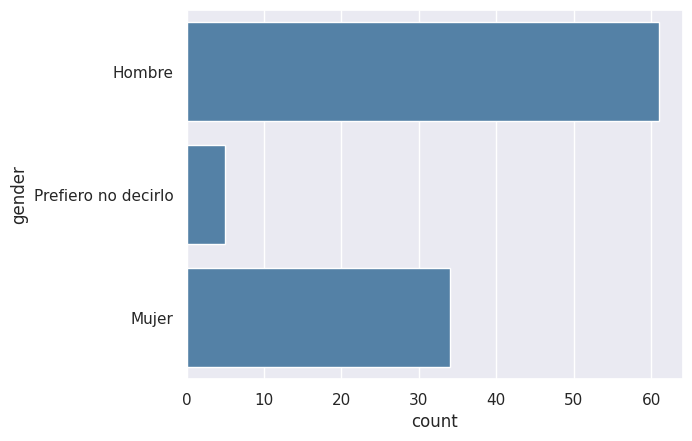

In [316]:
import seaborn
import matplotlib.pyplot as plt

seaborn.countplot(df.gender, color='steelblue')

Para calcular la probabilidad en lugar de la frecuencia de todos las respuestas posibles para cada columna de una forma más sencilla con la operación value_counts de pandas.

In [317]:
data = df['gender'].value_counts(normalize=True).reset_index()
data

,gender,proportion
0,Hombre,0.61
1,Mujer,0.34
2,Prefiero no decirlo,0.05


Dibujamos directamente sobre pandas

<Axes: ylabel='gender'>

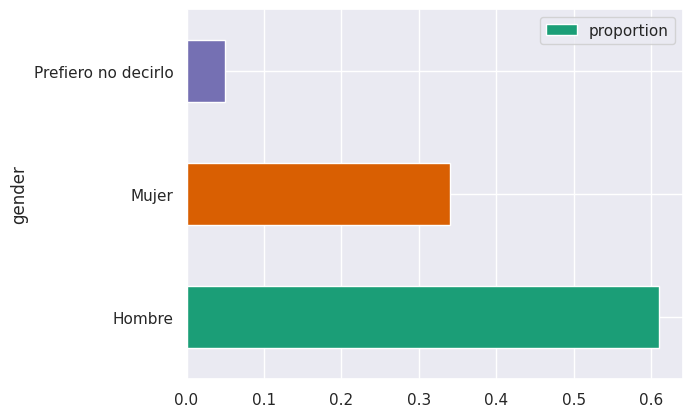

In [318]:

data.plot(x='gender', y='proportion', kind='barh', color=seaborn.palettes.mpl_palette('Dark2'))

## Probabilidad condicional

Ahora podemos pasar a hablar de la probabilidad condicional. La definimos como

$$P(A|B) = \frac{P(A \cap B)}{P(B)}$$

Esto es equivalente a:

$$P(A|B) = \frac{|A \cap B|}{|B|}$$

## Ejemplo 1

Calcular la probabilidad de que una respuesta tenga *gender=Mujer* dado que sabemos que tiene *zodiac_sign=Aries*

In [319]:
count_mujer_dado_aries = len(df[(df.gender == 'Mujer') & (df.zodiac_sign == 'Aries')])/len(df[df.zodiac_sign == 'Aries'])

print(count_mujer_dado_aries)

0.42857142857142855


Ejercicio 1
Calcular la probabilidad de que una respuesta tenga gender=Hombre dado que sabemos que tiene zodiac_sign=Tauro

In [320]:
count_hombre_dado_tauro = len(df[(df.gender == 'Hombre') & (df.zodiac_sign == 'Tauro')]) / len(df[df.zodiac_sign == 'Tauro'])

print(count_hombre_dado_tauro)

0.6666666666666666


## Independencia

Ahora, para saber si dos conjuntos son independientes, tenemos que comprobar si $P(A|B) = P(A)$ ó $P(A\cap B) = P(A)*P(B)$.



Ejercicio 2

Calcular si los conjuntos de respuestas con *gender=Mujer* y *zodiac_sign=Aries* son independientes o no, utilizando ambos métodos.

In [321]:
count_mujer = len(df[df.gender == 'Mujer']) / len(df)

count_aries = len(df[df.zodiac_sign == 'Aries']) / len(df)

count_mujer_aries = len(df[(df.gender == 'Mujer') & (df.zodiac_sign == 'Aries')]) / len(df)

if count_mujer_aries == count_mujer * count_aries:
    print("Los eventos Mujer y Aries son independientes.")
else:
    print("Los eventos Mujer y Aries no son independientes.")


Los eventos Mujer y Aries no son independientes.


# Distribuciones
## Funciones de densidad

Vimos en el teórico los conceptos de funciones de densidad y cómo varían según el tipo de datos. A pesar de que estos conceptos son muy similares, la hora de visualizarlos, tenemos que usar herramientas muy distintas.
### Densidad de probabilidad de variables categóricas

Ya vimos anteriormente cómo calcular esta probabilidad y cómo representarla usando gráficos de barra. Los gráficos de linea o gráficos de puntos no son apropiados porque implican secuencialidad en los datos.

Esta es otra manera de calcular la densidad de probabilidad:


([0, 1, 2, 3, 4, 5, 6, 7, 8],
 [Text(0, 0, 'Contador'),
  Text(1, 0, 'Ingeniero'),
  Text(2, 0, 'Profesor'),
  Text(3, 0, 'Estudiante'),
  Text(4, 0, 'Matemático'),
  Text(5, 0, 'Programador'),
  Text(6, 0, 'Maestro'),
  Text(7, 0, 'Economista'),
  Text(8, 0, 'Físico')])

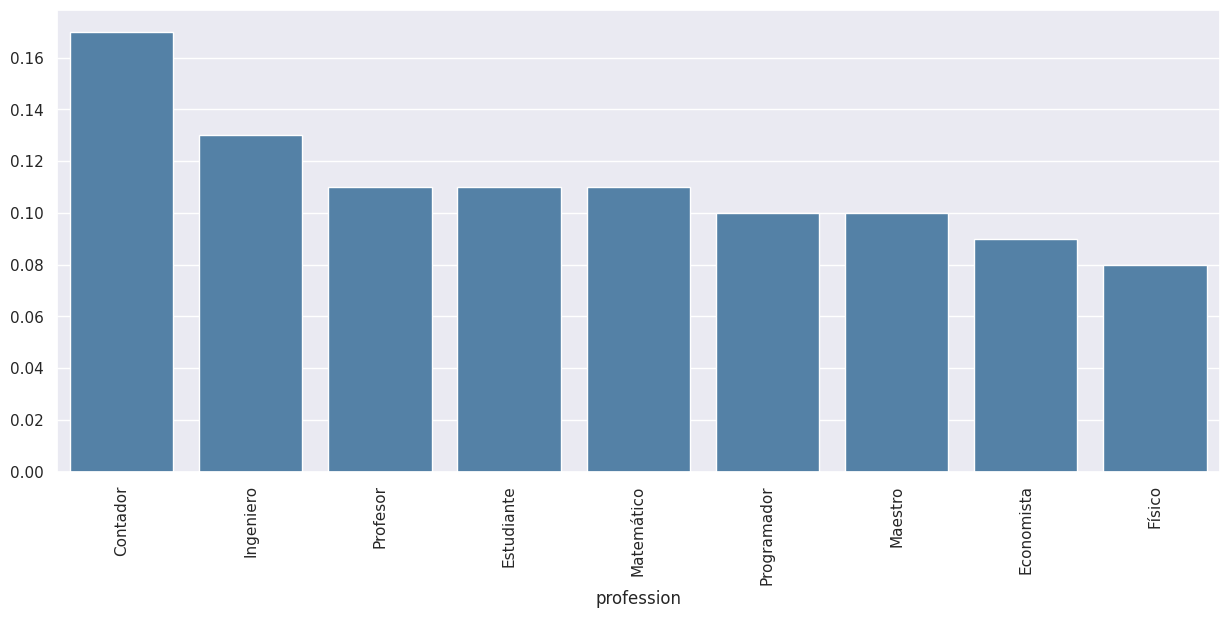

In [322]:
data = df.profession.value_counts(normalize=True)
seaborn.set_theme(style="darkgrid")
plt.figure(figsize=(15, 6))
seaborn.barplot(x=data.index, y=data.values, color='steelblue')
plt.xticks(rotation=90)

Pongamos las cosas en proporción. Muchas veces cambiar los ejes de los gráficos produce resultados muy distintos

(0.0, 1.0)

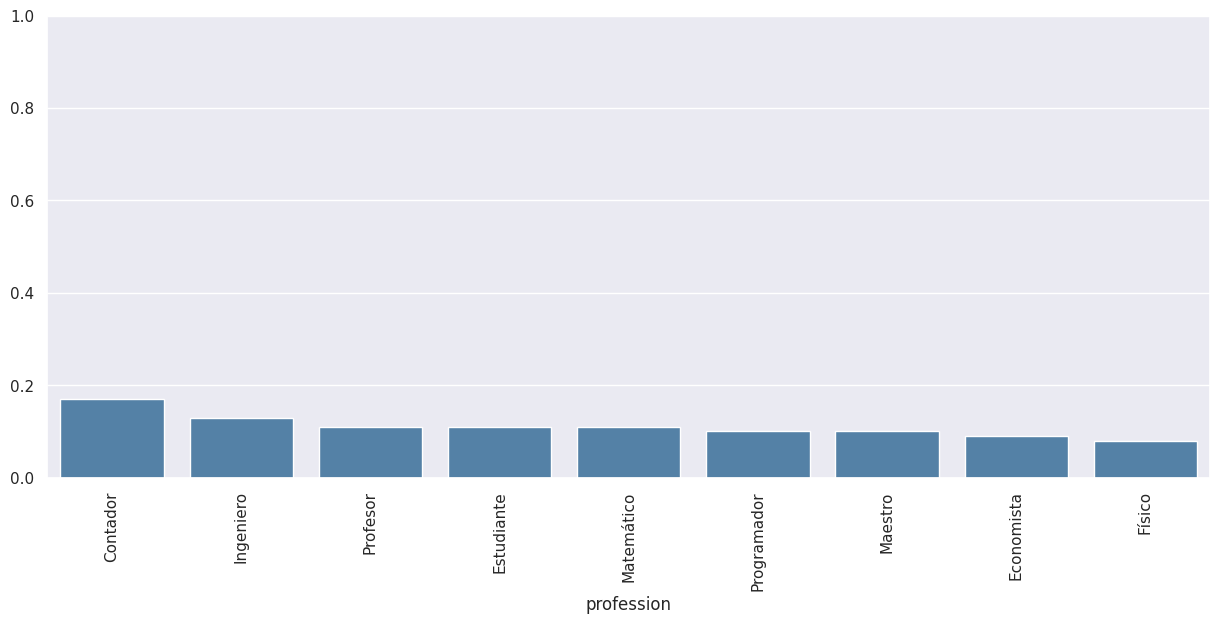

In [323]:
data = df.profession.value_counts(normalize=True)
plt.figure(figsize=(15, 6))
seaborn.barplot(x=data.index, y=data.values, color='steelblue')
plt.xticks(rotation=90)
plt.ylim(0, 1)

### Densidad de probabilidad para variables numéricas discretas

En el caso de las variables numéricas y ordinales, se pueden usar tanto gráficos de barra como gráficos de línea. Veamos que resultado podemos obtener

<Axes: xlabel='age'>

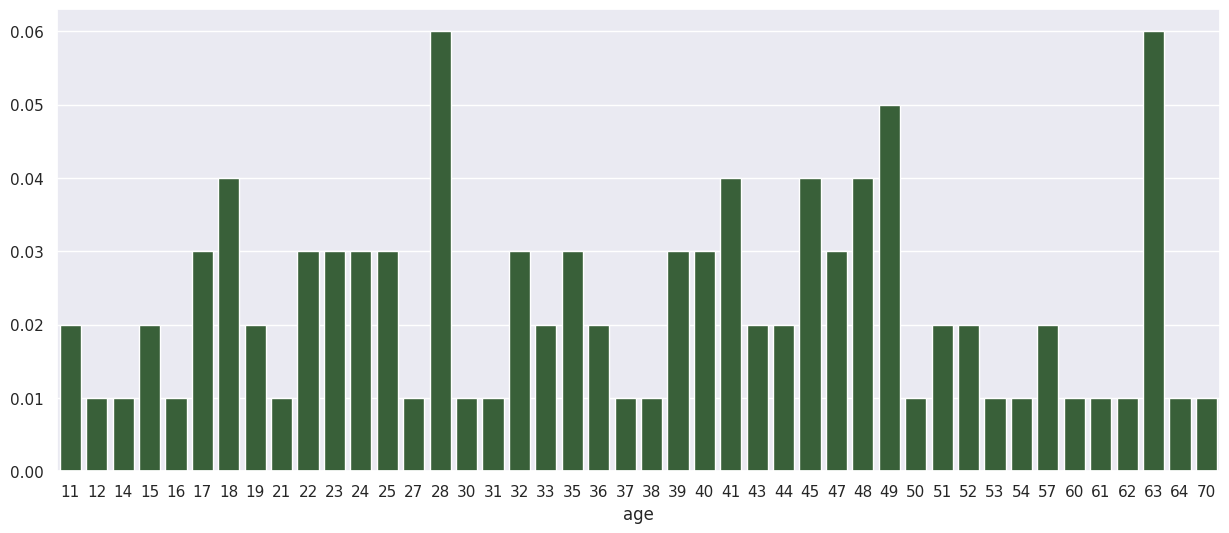

In [324]:
color = (0.2, # redness
         0.4, # greenness
         0.2, # blueness
         0.6 # transparency
         )
color2 = ['lightblue', 'blue', 'purple', 'red', 'black']
data = df.age.value_counts(normalize=True)
seaborn.color_palette("flare")
plt.figure(figsize=(15, 6))
seaborn.barplot(x=data.index, y=data.values,color=color)

<Axes: xlabel='age'>

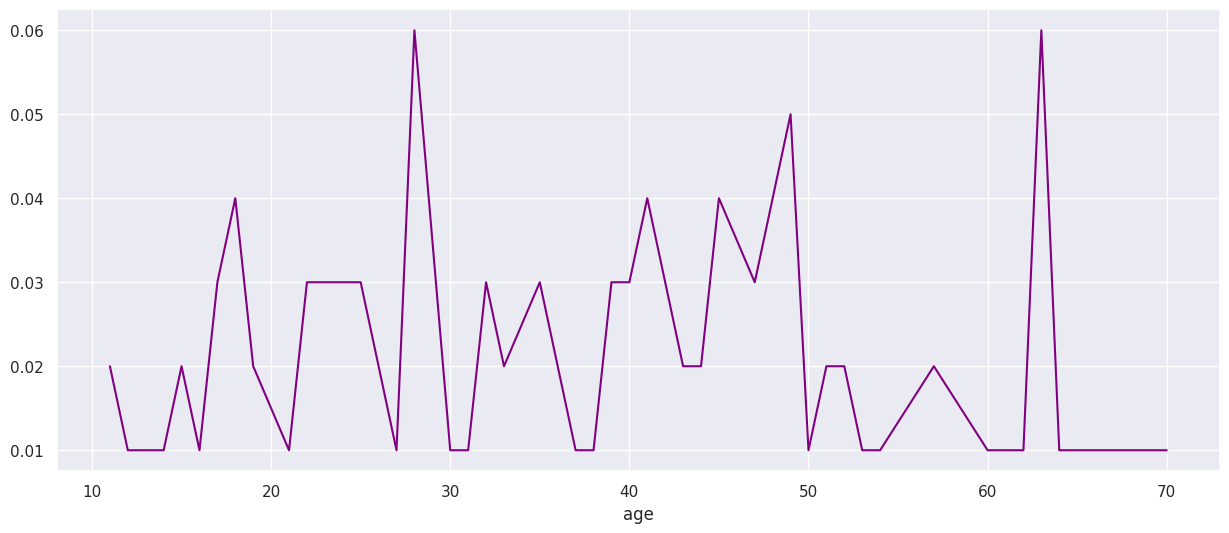

In [325]:
data = df.age.value_counts(normalize=True)
plt.figure(figsize=(15, 6))
seaborn.lineplot(x=data.index, y=data.values, color='purple')


En ambos gráficos, ¿están todos los valores representados? ¿qué sucedió con los valores faltantes? ¿Podríamos usar este tipo de gráfico si la variable pudiera tomar miles de valores posibles?

La forma más adecuada de representar esta infomación para variables numéricas es el histograma, que separa el rango completo de valores en contenedores (bins) ancho constante y cuenta cuántos ejemplos caen dentro de cada contenedor.

En muchos ejemplos de la web suele estar todavia el comando seaborn.displot pero ya ha sido reemplazado. Funciona pero chilla en agonía avisando que porto no va a estar mas disponible.






<ipython-input-326-cb712a49e1ae>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  seaborn.distplot(df.age, bins=15, kde=False, norm_hist=True, color ='red')


<Axes: xlabel='age'>

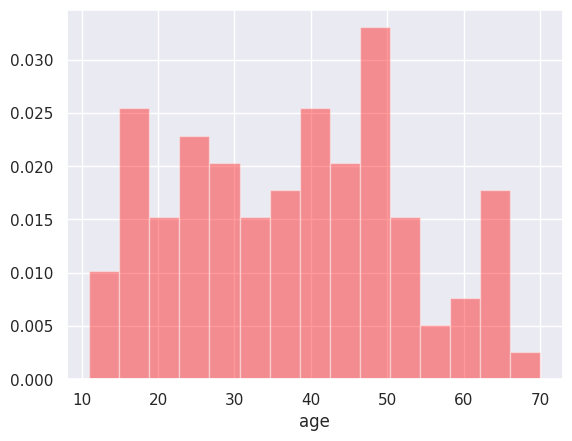

In [326]:
seaborn.distplot(df.age, bins=15, kde=False, norm_hist=True, color ='red')

La nueva funcion es bastante parecida.

<Axes: xlabel='age', ylabel='Density'>

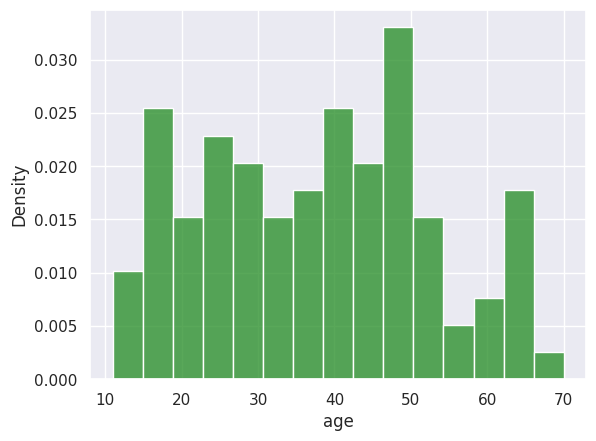

In [327]:
seaborn.histplot(df.age, bins=15, kde=False, stat="density",color='forestgreen')

La función seaborn.distplot has sido cambiada por la funcion seaborn.histplot. Para qur muestre frecuencia y no conteo se le agrega la keyword stat="density":

Una forma todavía más fácil de hacer un histograma es usando pandas mismo, pero el control sobre los elementos gráficos es menor:

<Axes: >

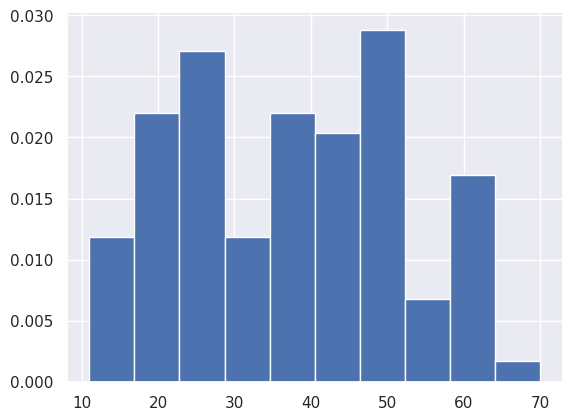

In [328]:
df.age.hist(density=1)

## Función de densidad acumulada

Pandas permite graficar la FDA de cualquier columna numérica:

<Axes: >

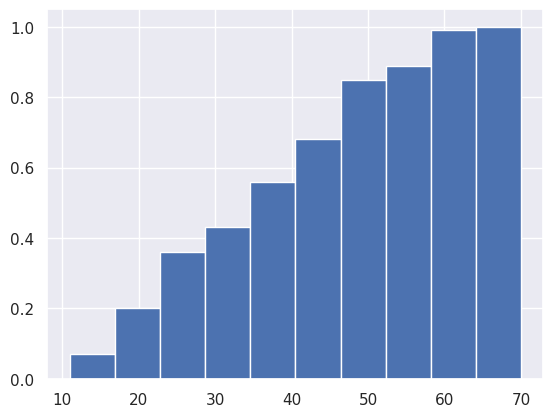

In [329]:
## Función de densidad acumulada
df.age.hist(cumulative=True, density=1)

<Axes: xlabel='age', ylabel='Proportion'>

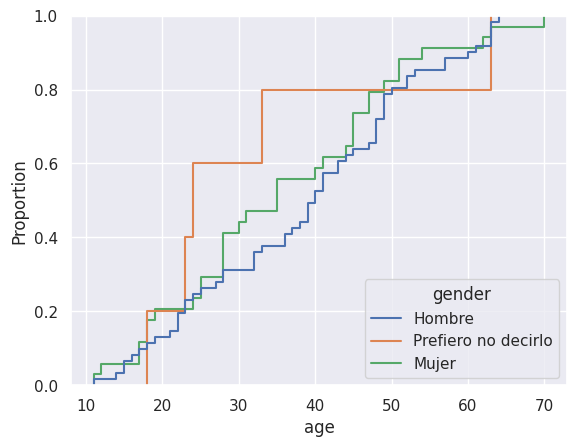

In [330]:
seaborn.ecdfplot(df, x="age", hue="gender")

<Axes: xlabel='age', ylabel='Proportion'>

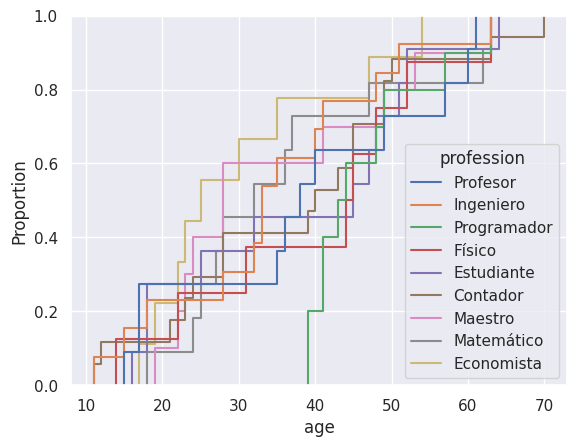

In [331]:
seaborn.ecdfplot(df, x="age", hue="profession")

In [332]:
dataset=df.copy()


## 2. Gráficos de barra

Comparan **cantidades numéricas** entre **variables categóricas**. Son uno de los encodings más fieles y fáciles de percibir, es decir, que podemos leer las cantidades represetadas con más exactitud que en otros tipos de gráficos.

Son gráficos muy versátiles, pero no siempre son adecuados. Mientras más barras se grafican, menos atención se pone en la variación entre una barra y otra, y más evidente es la distribución total. Los gráficos de barra también son muy sensibles al ordenamiento, ya que mientras más alejadas están las barras más difícil es compararlas. Por otra parte, la diferencia en el tamaño de cada barra puede codificar sólo cierta cantidad de información. Por ejemplo, si las barras son grandes en alto, una pequeña diferencia entre ellas pasará desapercibida, mientras que si las barras son pequeñas, la misma diferencia será más evidente.

Los gráficos de barra son lo más adecuados para ver las variables categorícas, por ejemplo, el género. Además de eso, necesitamos seleccionar una variable aleatoria con datos numéricos para poder graficar en el eje y. Tomemos la estimación del sueldo para juniors. Veamos cómo se construye uno de estos gráficos:

<Axes: xlabel='gender', ylabel='junior_programmer_salary'>

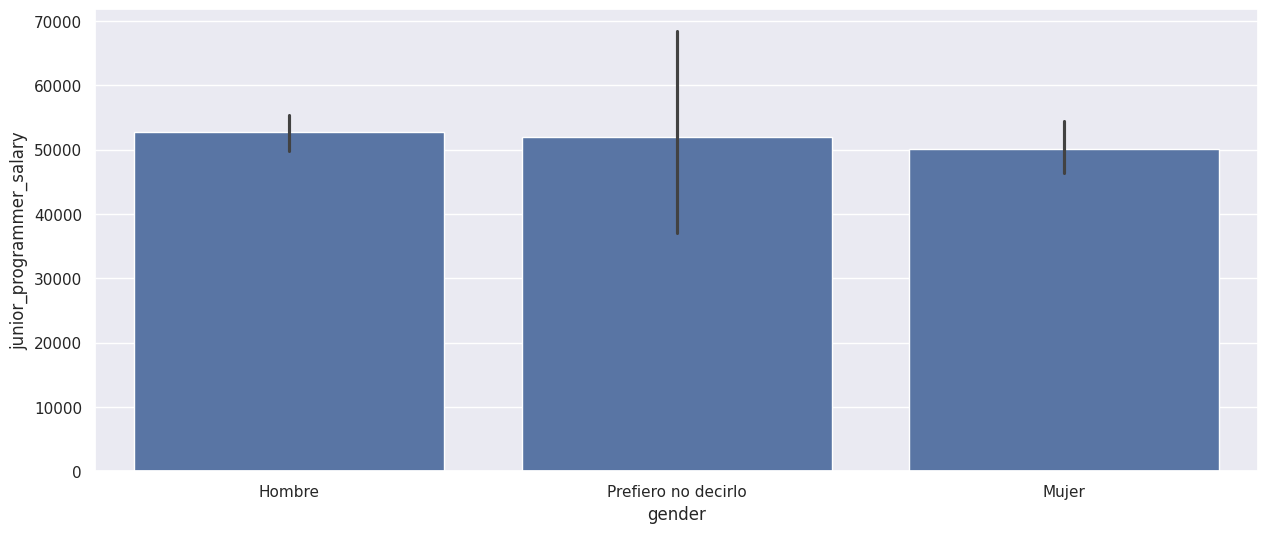

In [333]:
seaborn.set_theme(style="darkgrid")
plt.figure(figsize=(15, 6))
seaborn.barplot(data=dataset, x='gender', y='junior_programmer_salary')

En este gráfico estamos usando la altura de las barras para representar el promedio de las estimaciones de salario para cada uno de los grupos. Sin embargo, esto no es evidente a primera vista. El usuario no tiene suficiente información para inferir el significado del eje vertical. Hay que tener en cuenta que muchas veces, **el nombre original de la columna no representa la información agregada**.

Por otra parte, ¿qué significan las líneas negras? Son los intervalos de confianza, que tienen un valor por default de 95. Indica que el verdadero valor poblacional del estadístico se encuentra en ese rango, con una confianza del 95%. Por eso vemos que (probablemente) para varones y mujeres, el rango es mucho más pequeño, ya que la muestra es mucho más grande. Para otros grupo minoritario, no tenemos certeza del valor real de la media poblacional porque la muestra es demasiado pequeña.

Este estadísico suele ser difícil de interpretar para quienes no son expertos en estadística, puede ser conveniente reemplazarlo por la desviación estándar de la muestra. Si bien estamos usando la misma codificación visual (las rayitas negras), los valores que representamos son completamente distintos. Si usamos un intervalo de confianza, estamos hablando de la distribución del estimador de la media poblacional, que es una variable aleatorio que toma valores en todas las muestras posibles. Por otro lado, si usamos la desviación estándar, estamos hablando del valor del estadístico en esta muestra.

Con esas observaciones, podemos construir un gráfico más representativo.

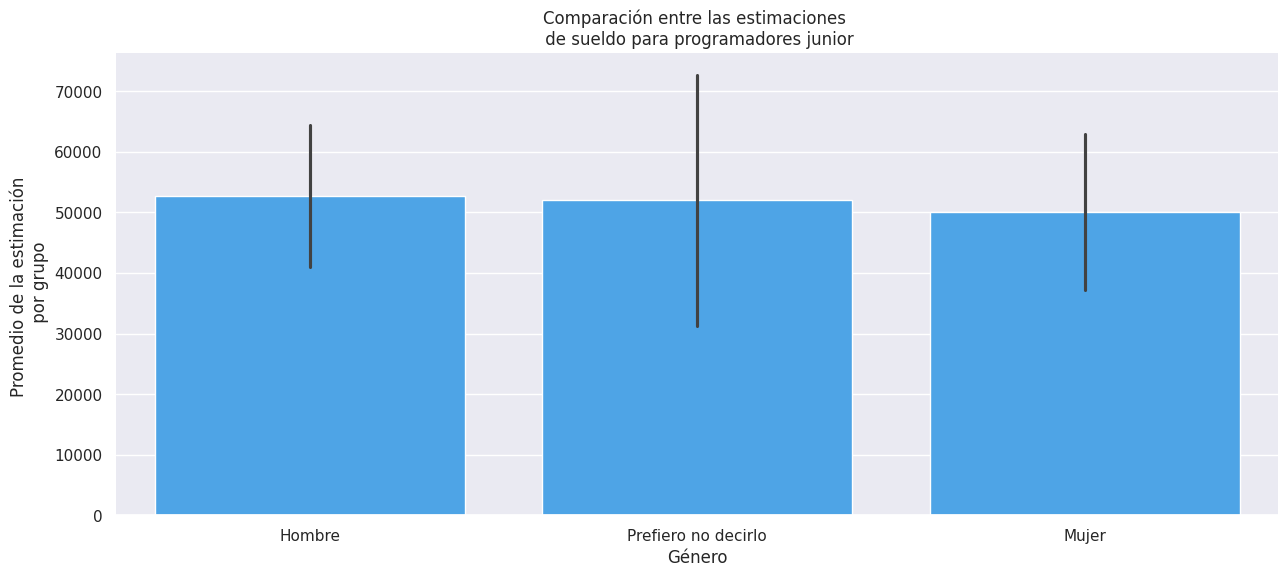

In [334]:
plt.figure(figsize=(15,6))
seaborn.barplot(data=dataset, x='gender', y='junior_programmer_salary',
                color=BLUE, errorbar='sd')
plt.ylabel('Promedio de la estimación \n por grupo')
plt.xlabel('Género')
plt.title('Comparación entre las estimaciones \n de sueldo para programadores junior')
seaborn.despine(left=True)

### 2.1 Agrupaciones

Es muy útil poder comparar también más de una variable categórica a la vez. Para ello, podemos usar el atributo `hue` de los gráficos de barra.

En general, conviene agrupar por la variable que tengan menos categorías. Entonces, si queremos comparar las estimaciones de sueldo con respecto la profesión y el género, conviene agrupar por género, que sólo puede tener 4 variables posbiles.

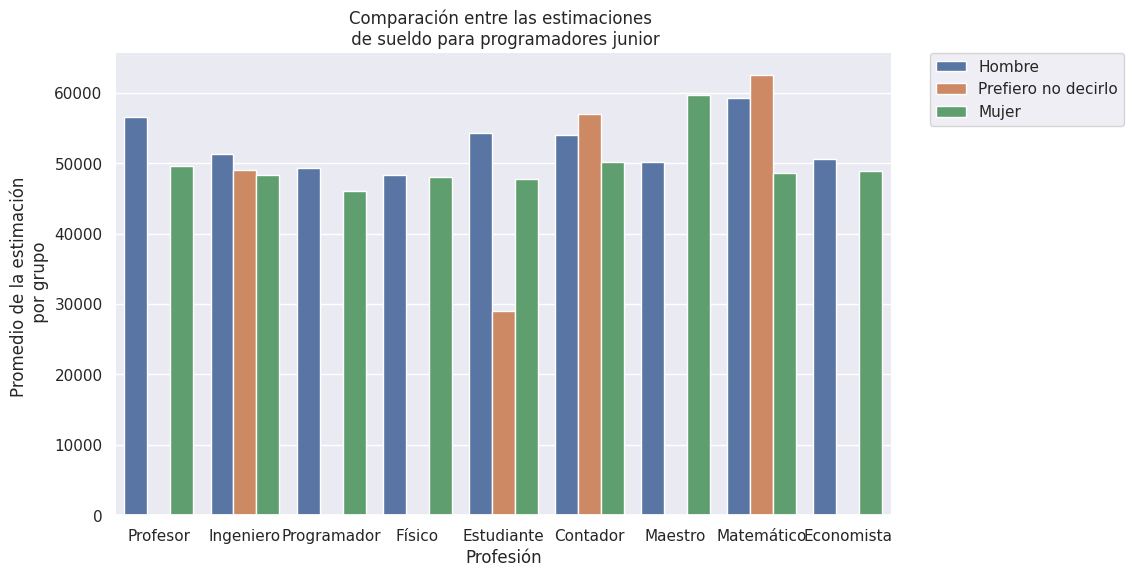

In [335]:
plt.figure(figsize=(10,6))
seaborn.barplot(data=dataset, x='profession', y='junior_programmer_salary',
                hue='gender', errorbar=None)
plt.ylabel('Promedio de la estimación \n por grupo')
plt.xlabel('Profesión')
plt.title('Comparación entre las estimaciones \n de sueldo para programadores junior')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
seaborn.despine(left=True)

¡El primer gráfico nos queda un desastre! Esto ocurre porque:
1. No podemos leer las etiquetas del eje x. Por suerte, esto es muy fácil de solucionar agregando `plt.xticks(rotation=90)`
1. La cantidad de valores para el campo profesión son demasiadas para un gráfico. Esto es solucionable: o bien manualmente agrupamos las categorías en valores estándar, o nos limitamos sólo a graficar las categorías con más datos.
1. No tenemos suficientes puntos para generar columnas para todas las combinaciones. Esta limitación es más difícil de solucionar, y puede indicarnos que este no es el método adecuado para representar esta información.
4. ¿Se les ocurren más?

Tratemos entonces con un gráfico que sí tenga sentido: dada la cantidad de respuestas, esperamos tener suficientes ejemplos para los dos géneros más populares y para casi todos los signos del zodiaco (a pesar de que no saquemos ninguna información útil de graficar esto).

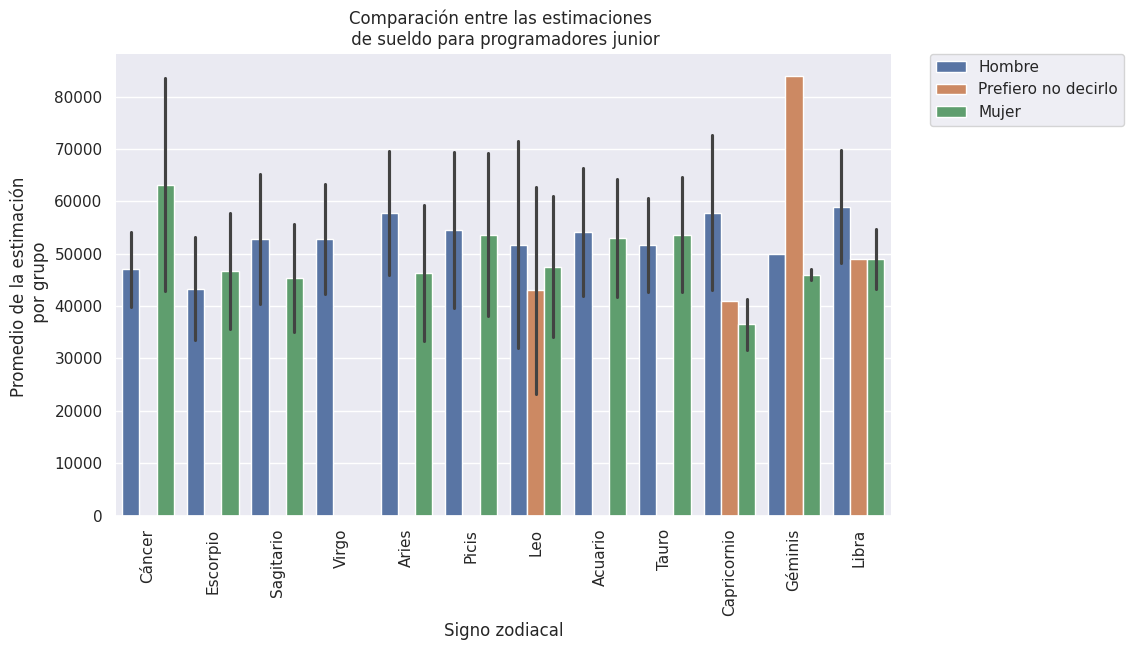

In [336]:
plt.figure(figsize=(10,6))
seaborn.barplot(data=dataset, x='zodiac_sign', y='junior_programmer_salary',
                hue='gender', errorbar='sd')
plt.ylabel('Promedio de la estimación \n por grupo')
plt.xlabel('Signo zodiacal')
plt.title('Comparación entre las estimaciones \n de sueldo para programadores junior')
plt.xticks(rotation=90)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
seaborn.despine(left=True)

### 2.2 Countplot

Otro gráfico de barra muy útil es el que en el eje vertical tiene el conteo de la cantidad de registros en una categoría. ¡Seaborn puede graficar esto muy fácilmente!

<Axes: xlabel='gender', ylabel='count'>

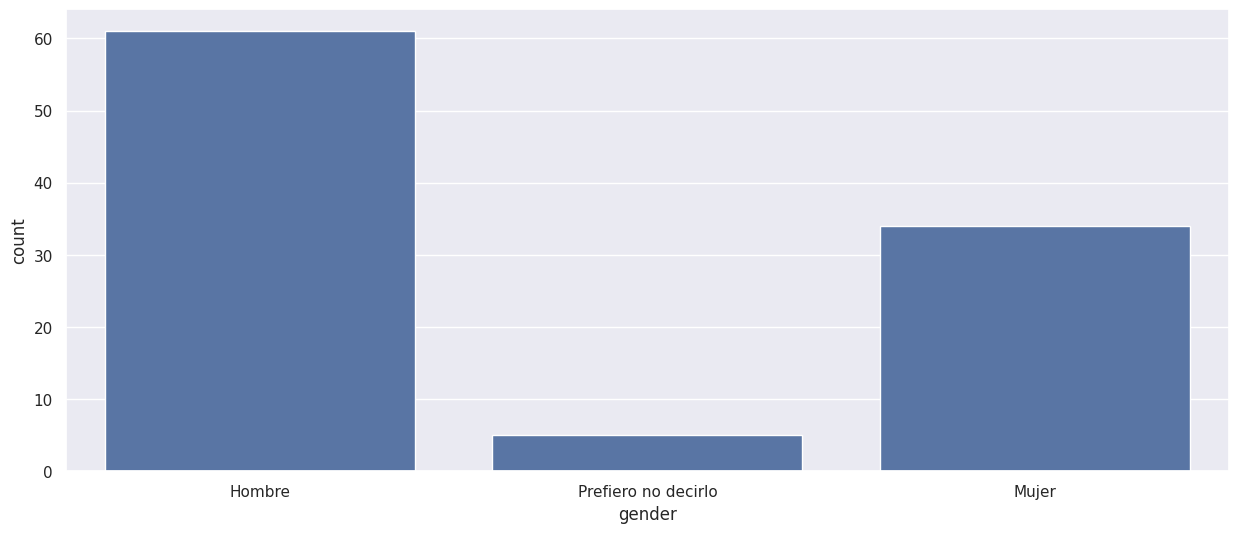

In [337]:
plt.figure(figsize=(15,6))
seaborn.countplot(data=dataset, x='gender')

## 3. Histogramas

Muestra la distribución de una variable numérica, dividiendo las variables en segmentos (*bins*) o estimando una función de densidad. Ojo, ¡no es lo mismo que un gráfico de barras!

Por ejemplo, podemos graficar con más precisión la distribución de la variable *junior_programmer_salary*.

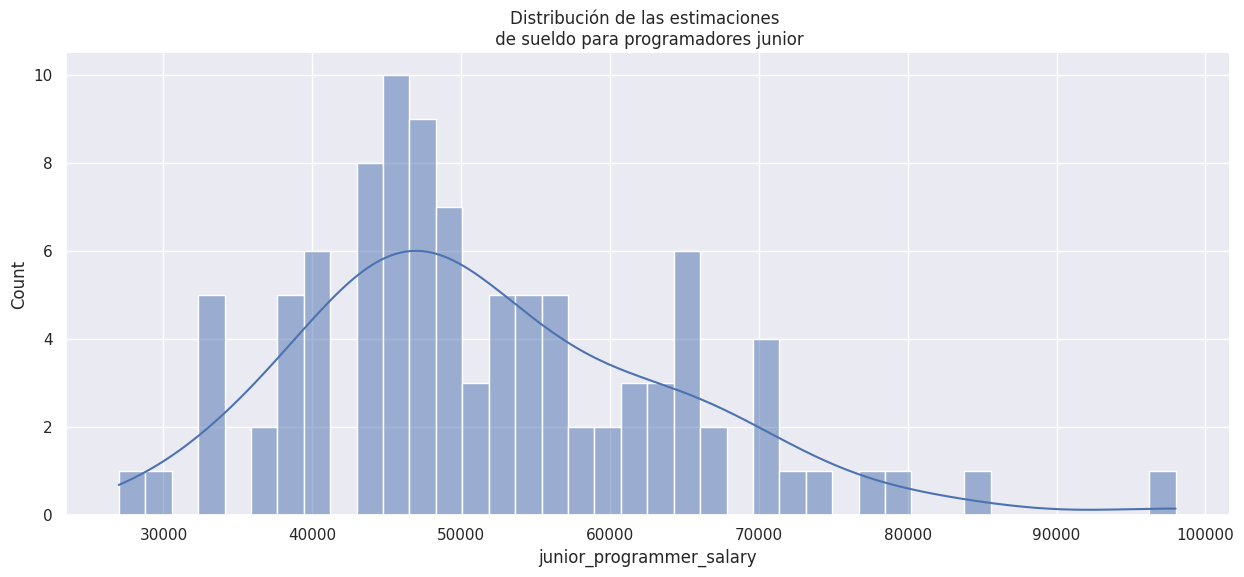

In [338]:
plt.figure(figsize=(15,6))
plt.title('Distribución de las estimaciones \n de sueldo para programadores junior')
seaborn.histplot(dataset.junior_programmer_salary.dropna(), kde=True, bins=40)
seaborn.despine()

### 3.1 Outliers

Es muy probable que encontremos outliers en nuestro dataset que complican la visualización.

Una forma de calcular los outliers es con los percentiles o dejando sólo los que se encuentran en un rango de X desviaciones estándares de la media.

In [339]:
import numpy
def clean_outliers(dataset, column_name):
    """Returns dataset removing the outlier rows from column @column_name."""
    interesting_col = dataset[column_name]
    # Here we can remove the outliers from both ends, or even add more restrictions.
    mask_salarios_outlier = (
        numpy.abs(interesting_col - interesting_col.mean()) <= (2.5 * interesting_col.std()))
    return dataset[mask_salarios_outlier]

data = clean_outliers(dataset, "junior_programmer_salary").junior_programmer_salary
print("Filas removidas", len(dataset) - len(data))
print("Salario máximo considerado", data.max())

Filas removidas 2
Salario máximo considerado 80000


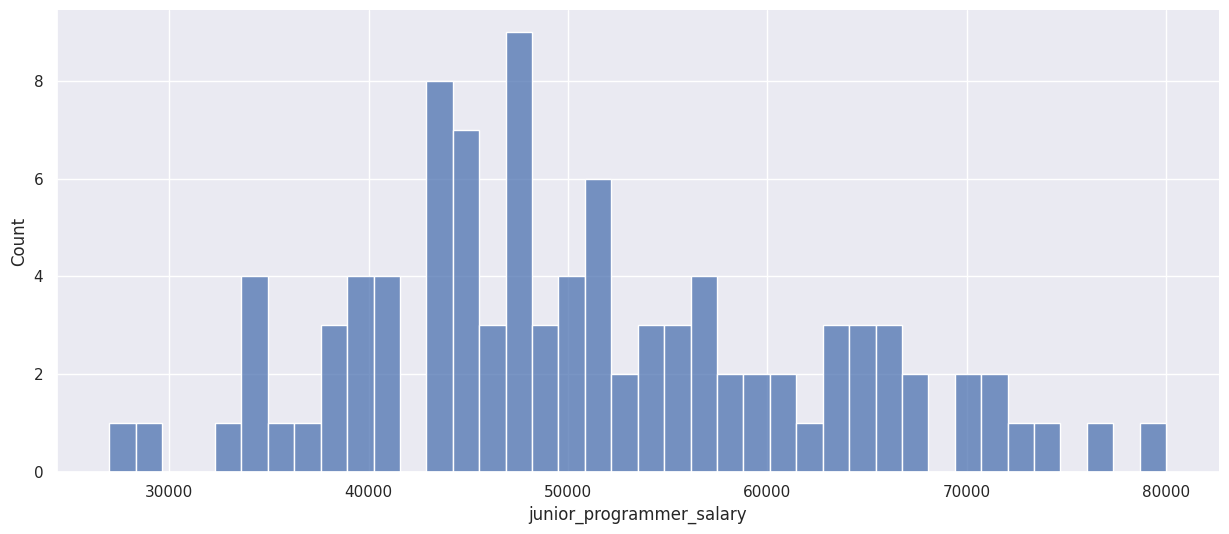

In [340]:
plt.figure(figsize=(15,6))
seaborn.histplot(data, bins=40)
seaborn.despine()

### 3.2 Múltiples histogramas

¡Podemos finalmente comparar las distribuciones de los salarios para seniors y para juniors! Graficaremos dos histogramas, uno por encima del otro.

Index(['Unnamed: 0', 'gender', 'age', 'zodiac_sign', 'profession',
       'junior_programmer_salary', 'senior_programmer_salary'],
      dtype='object')


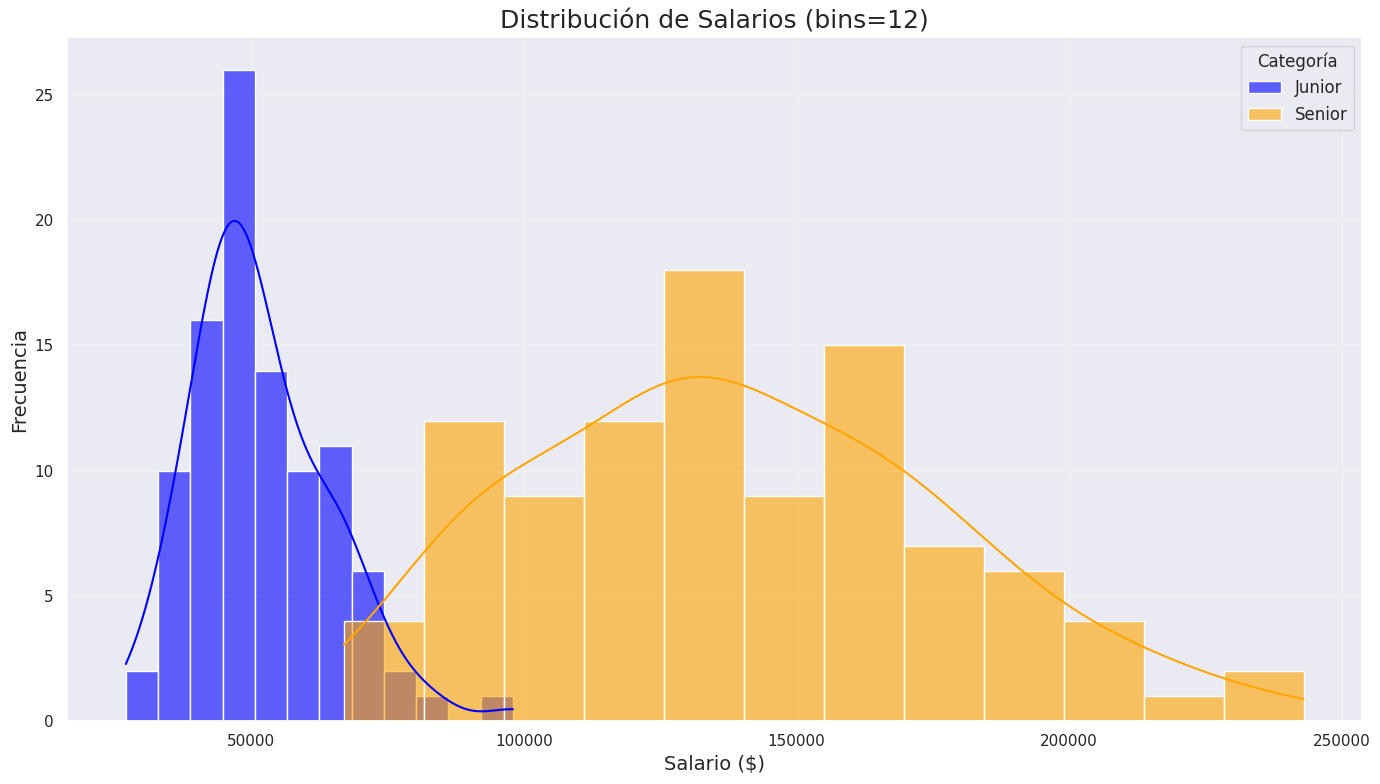

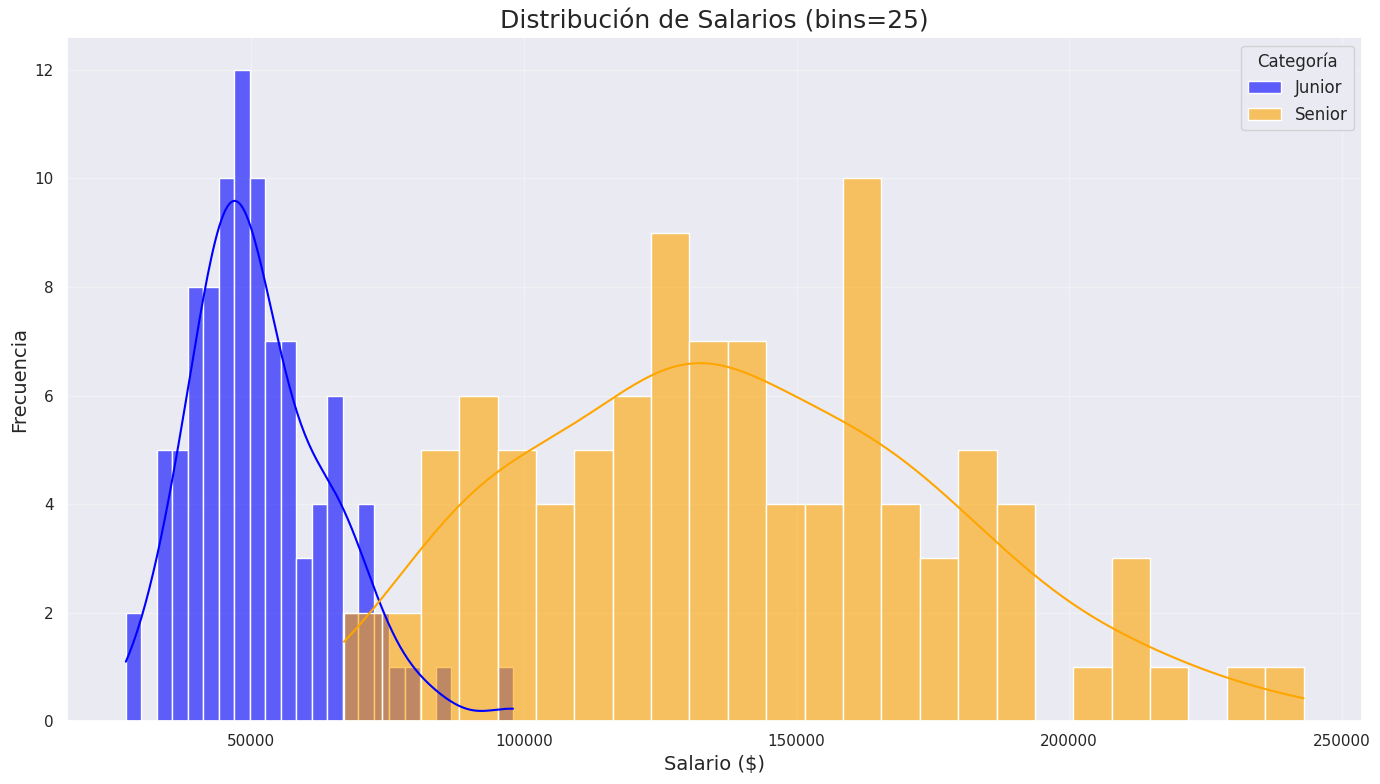

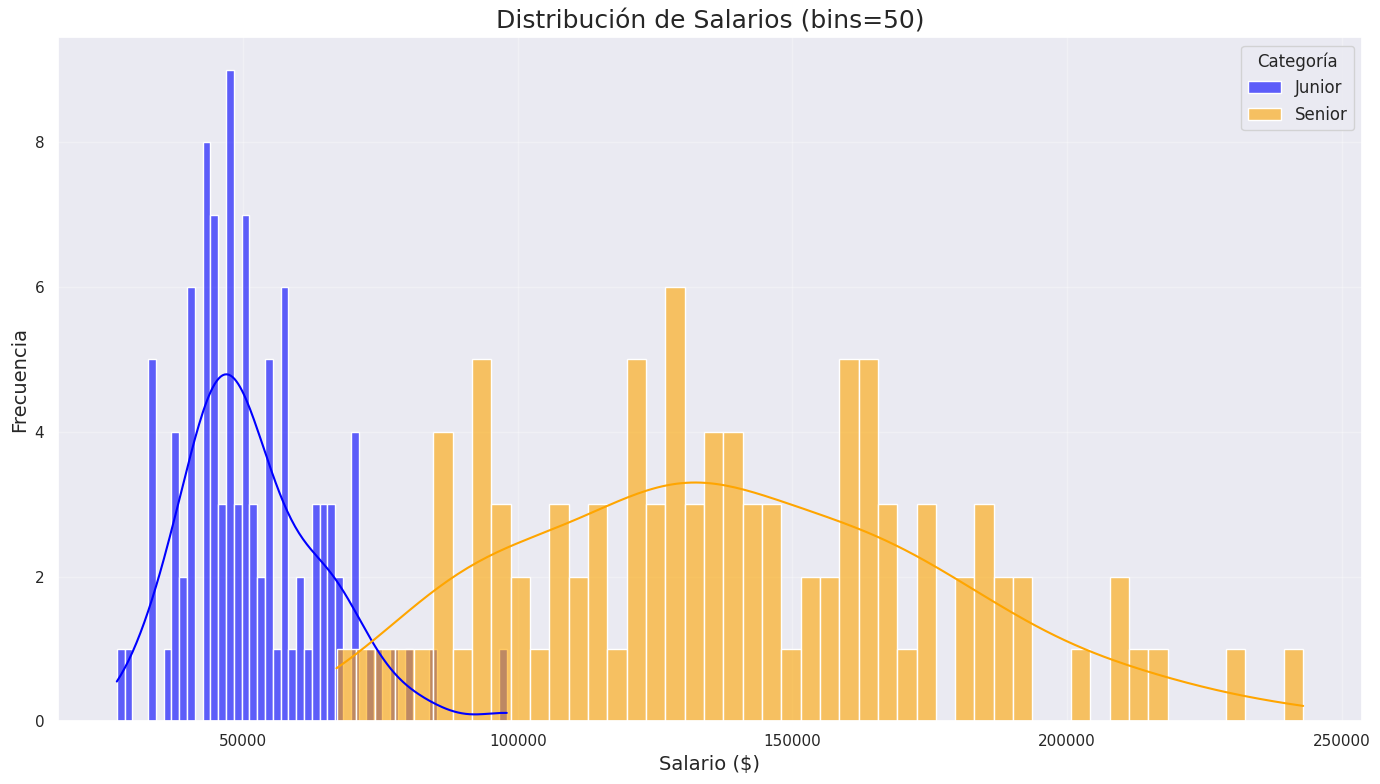

In [341]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Cargar el dataset
df = pd.read_csv('/content/generated_dataset.csv')

# Revisar las columnas del dataset
print(df.columns)

# Remover outliers (ejemplo: salarios fuera de rangos esperados)
filtered_df = df[
    (df['junior_programmer_salary'] > 20000) & (df['junior_programmer_salary'] < 150000) &
    (df['senior_programmer_salary'] > 30000) & (df['senior_programmer_salary'] < 250000)
]

# Definir valores de bins para experimentar
bins_list = [12, 25, 50]

for bins in bins_list:
    plt.figure(figsize=(14, 8))
    sns.histplot(filtered_df['junior_programmer_salary'], label='Junior', kde=True, color='blue', alpha=0.6, bins=bins)
    sns.histplot(filtered_df['senior_programmer_salary'], label='Senior', kde=True, color='orange', alpha=0.6, bins=bins)

    # Personalizar el gráfico
    plt.title(f'Distribución de Salarios (bins={bins})', fontsize=18)
    plt.xlabel('Salario ($)', fontsize=14)
    plt.ylabel('Frecuencia', fontsize=14)
    plt.legend(title='Categoría', fontsize=12)
    plt.grid(alpha=0.3)
    plt.tight_layout()
    plt.show()




## Ejercicio 1

* Limpiar el gráfico anterior para hacerlo más legible. Por ejemplo, agregar título y etiquetas, remover los outliers, agrandar el tamaño, cambiar el color. etc.
* Experimentar con distintos valores para el parámetro `bins`. ¿Cuál es el valor por defecto? ¿Qué sucede cuando es muy bajo? ¿Y cuando es muy alto?
* ¿A qué distribuciones de las vistas en clase se parece más cada histograma? ¿Son distintas? ¿Qué las diferencia?

In [342]:
def to_categorical(column, bin_size=5, min_cut=15, max_cut=50):
    if min_cut is None:
        min_cut = int(round(column.min())) - 1
    value_max = int(numpy.ceil(column.max()))
    max_cut = min(max_cut, value_max)
    intervals = [(x, x + bin_size) for x in range(min_cut, max_cut, bin_size)]
    if max_cut != value_max:
        intervals.append((max_cut, value_max))
    print(intervals)
    return pandas.cut(column, pandas.IntervalIndex.from_tuples(intervals))

[(15, 20), (20, 25), (25, 30), (30, 35), (35, 40), (40, 45), (45, 50), (50, 70)]


(array([ 0. ,  2.5,  5. ,  7.5, 10. , 12.5, 15. , 17.5, 20. ]),
 [Text(0.0, 0, '0.0'),
  Text(2.5, 0, '2.5'),
  Text(5.0, 0, '5.0'),
  Text(7.5, 0, '7.5'),
  Text(10.0, 0, '10.0'),
  Text(12.5, 0, '12.5'),
  Text(15.0, 0, '15.0'),
  Text(17.5, 0, '17.5'),
  Text(20.0, 0, '20.0')])

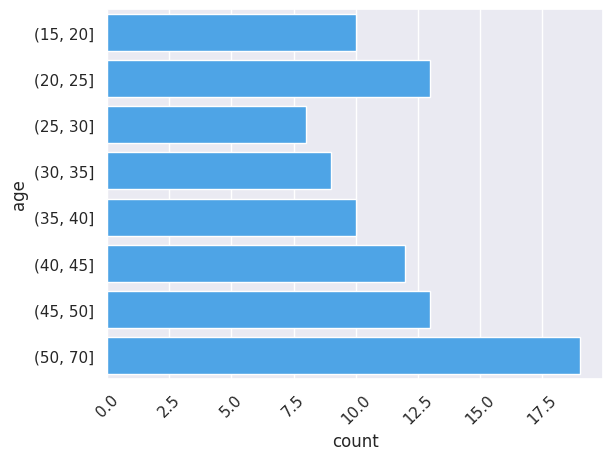

In [343]:
seaborn.countplot(to_categorical(dataset.age.dropna()), color=BLUE)
plt.xticks(rotation=45)


In [344]:

age_data = clean_outliers(dataset, "junior_programmer_salary")
age_data = age_data[~age_data.age.isnull()]
age_data['age_segment'] = to_categorical(age_data.age)



[(15, 20), (20, 25), (25, 30), (30, 35), (35, 40), (40, 45), (45, 50), (50, 70)]


## Gráficos de caja

Muestra la distribución de una variable numérica, de una forma más condensada que un histograma. Son muy útiles para comparar muchas distribuciones, pero sólo cuando son muy distintas entre ellas, ya que oscurecen algunas sutilezas. Otros problema de este tipo de gráficos es que *no todo el mundo recuerda cómo leerlos*.

Por ejemplo, volvamos al ejemplo anterior para comparar la distribución de las estimaciones para el salario de un junior. Con un gráfico de caja, se vería de la siguiente manera:

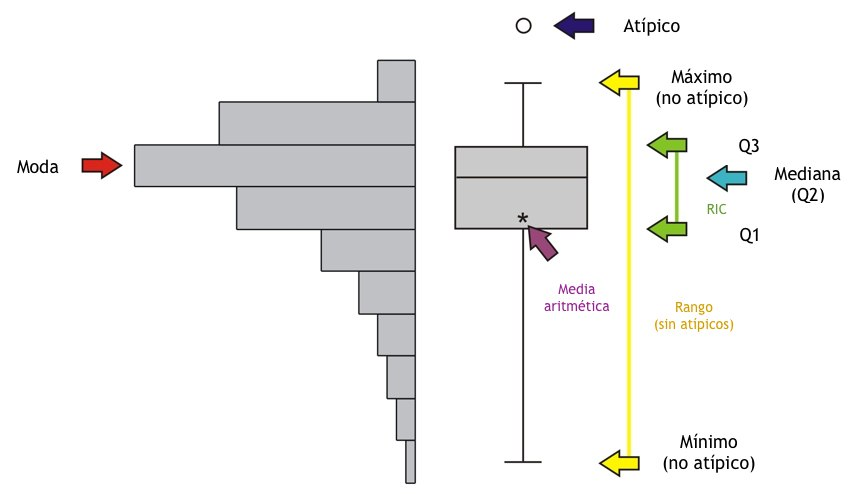

In [345]:
print('MEDIDAS DE POSICIÓN:')
media = dataset.junior_programmer_salary.mean()
print('media =', media)
print('mediana =', dataset.junior_programmer_salary.median())

Q_1 = dataset.junior_programmer_salary.quantile(0.25) #primer cuartil
print('Q_1=', Q_1)

print('Q_2 o mediana=', dataset.junior_programmer_salary.quantile(0.5)) #otra forma de calcular la mediana

Q_3 = dataset.junior_programmer_salary.quantile(0.75) #tercer cuartil
print('Q_3=', Q_3)

print('--------------')
print('MEDIDAS DE DISPERSIÓN:')
print('Rango=(max-min)=', dataset.junior_programmer_salary.max()-dataset.junior_programmer_salary.min())


desviacion = dataset.junior_programmer_salary.std() #desviación estandar
print('Desviación poblacional=', desviacion)

print('Varianza poblacional=', dataset.junior_programmer_salary.var())

RIC = Q_3-Q_1 #rango intercuartil
print('RIC=', RIC)

CV = round((desviacion / media) * 100, 2) #redondea 2 decimales
print('CV=', CV, '%')

MEDIDAS DE POSICIÓN:
media = 51830.0
mediana = 49500.0
Q_1= 43000.0
Q_2 o mediana= 49500.0
Q_3= 59250.0
--------------
MEDIDAS DE DISPERSIÓN:
Rango=(max-min)= 71000
Desviación poblacional= 12559.398267770826
Varianza poblacional= 157738484.84848484
RIC= 16250.0
CV= 24.23 %


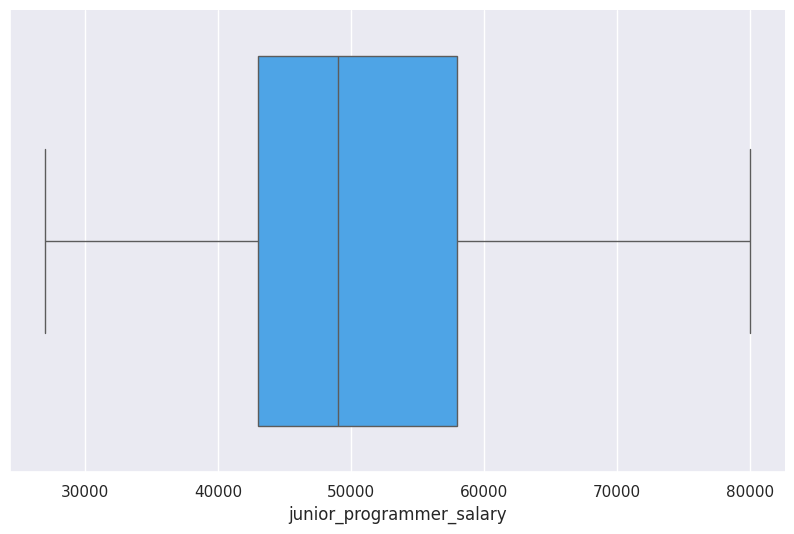

In [346]:
plt.figure(figsize=(10,6))
seaborn.boxplot(data=age_data,
                 x='junior_programmer_salary',
                color=BLUE)


seaborn.despine()

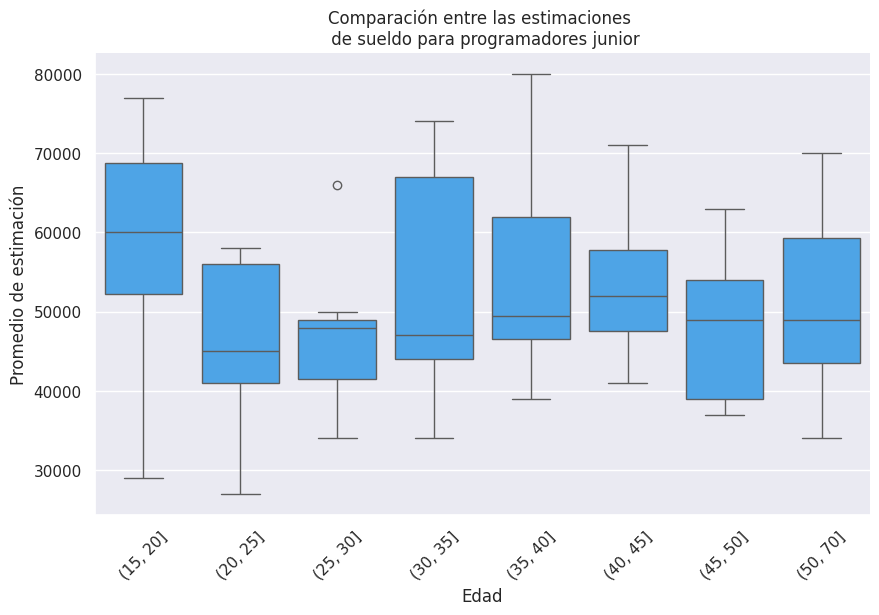

In [347]:
plt.figure(figsize=(10,6))
seaborn.boxplot(data=age_data,
                x='age_segment', y='junior_programmer_salary',
                color=BLUE)
plt.ylabel('Promedio de estimación')
plt.xlabel('Edad')
plt.title('Comparación entre las estimaciones \n de sueldo para programadores junior')
plt.xticks(rotation=45)
seaborn.despine()

Con los boxplot también podemos comparar distribuciones por grupos. En este caso, si un grupo tiene una población muy reducida, su influencia visual es mucho menor ya que se traducen a cajas pequeñas o incluso sólo puntos.

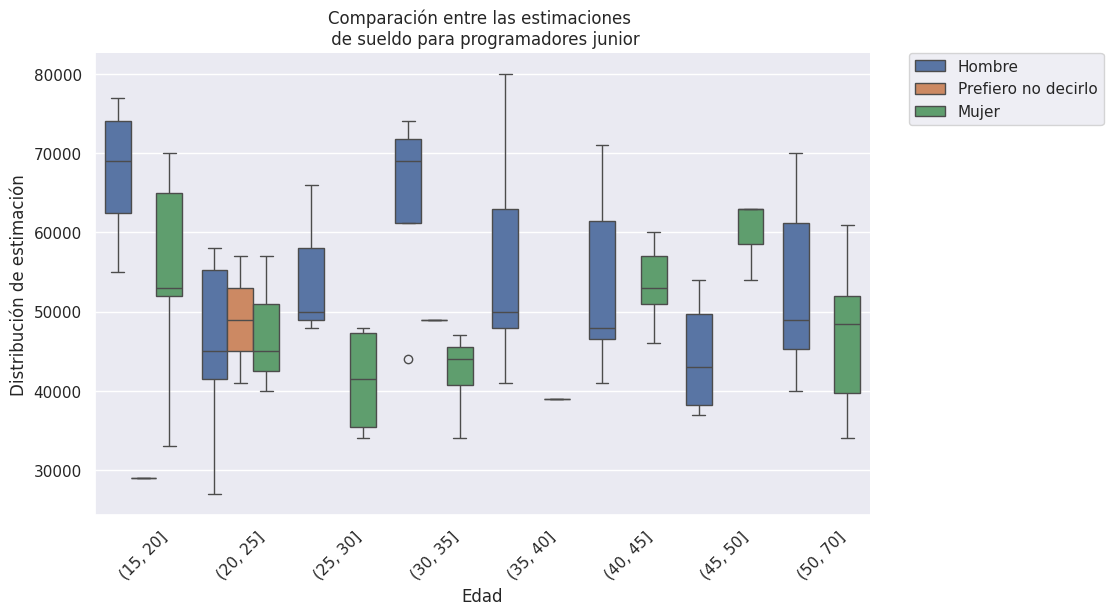

In [348]:
plt.figure(figsize=(10,6))
seaborn.boxplot(data=age_data,
                x='age_segment', y='junior_programmer_salary',
                hue='gender')
plt.ylabel('Distribución de estimación')
plt.xlabel('Edad')
plt.title('Comparación entre las estimaciones \n de sueldo para programadores junior')
plt.xticks(rotation=45)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
seaborn.despine()

En este gráfico podemos ver, por ejemplo, todos los outliers con sueldos mayores a 100,000, que en el otro gráfico se agrupaban dentro de la barra de desviación estándar.

## Gráficos de puntos (scatterplot)

Muestra la relación entre 2 o 3 variables numéricas continuas. Adicionalmente, se puede usar el color y la forma de los puntos para variables categóricas, y el tamaño para una variable numérica extra.

Para poder ejemplificar el gráfico de puntos, debemos encontrar dos variables numéricas continuas. Tener en cuenta que por más que una variable sea discreta, al incluirla en un scatter plot la estamos tratando como una variable continua.

<Axes: xlabel='age', ylabel='junior_programmer_salary'>

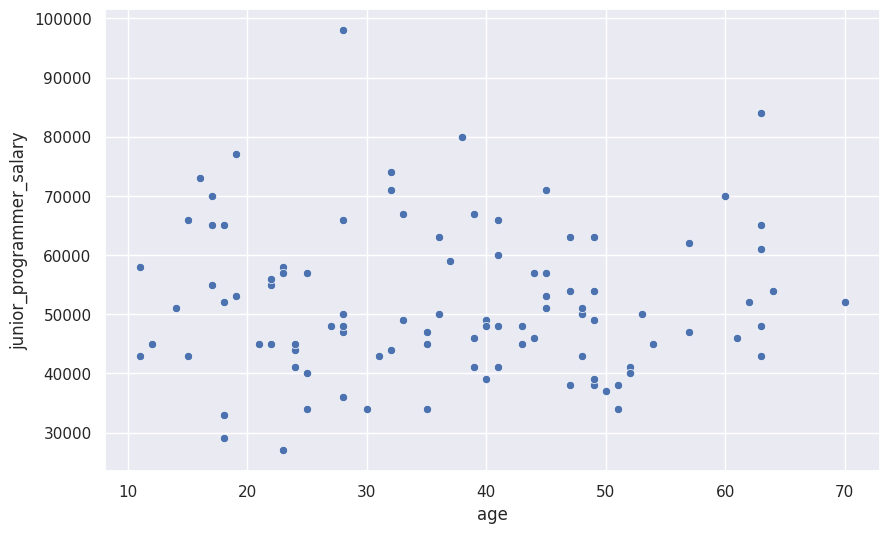

In [349]:
plt.figure(figsize=(10,6))
seaborn.scatterplot(data=dataset,
                    x='age',
                    y='junior_programmer_salary')

Para hacer más evidente las tendencias que pueda tener el gráico, podemos utilizar seaborn para estimar una regresión lineal con los datos, utilizando el gráfico seaborn.regplot. Sin embargo, existen maneras más efectivas de medir correlación, gráficas y analíticas, que veremos más adelante.

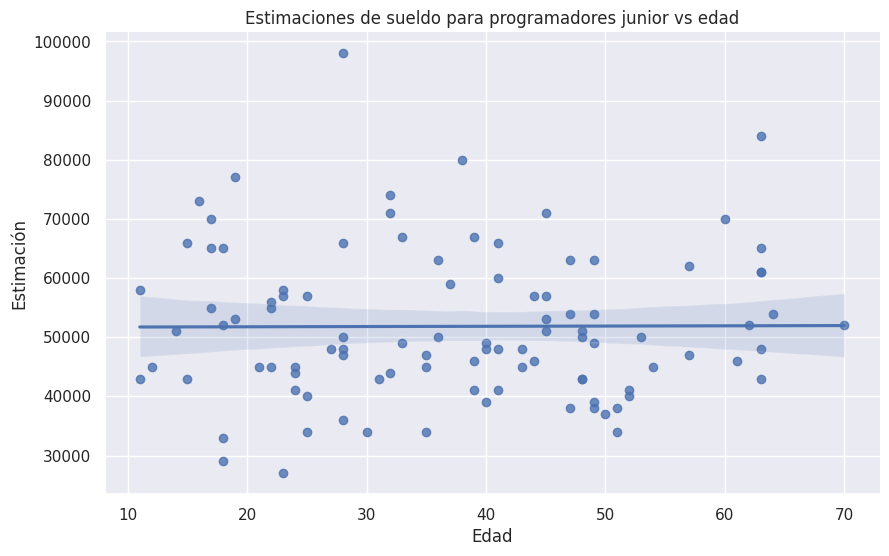

In [350]:
plt.figure(figsize=(10,6))
seaborn.regplot(data=dataset, x='age',
                y='junior_programmer_salary')
plt.ylabel('Estimación')
plt.xlabel('Edad')
plt.title('Estimaciones de sueldo para programadores junior vs edad')
seaborn.despine()

## Heatmaps

Los heatmaps se utilizan para codificar la relación entre dos variables categóricas o discretas (o discretizadas). Si alguna de las variables es numérica, se puede discretizar o utilizar otro tipo de gráfico como `regplot`,  `pairplot` o `catplot`.

Por ejemplo, una pregunta posible podría ser **¿Nuestra muestra, está uniformente distribuida en cuando a género y edad?**. Para hacer el análisis más fácil, usaremos la misma separación en segmentos que en la notebook anterior.

In [351]:

def to_categorical(column, bin_size=5, min_cut=15, max_cut=50):
    if min_cut is None:
        min_cut = int(round(column.min())) - 1
    value_max = int(numpy.ceil(column.max()))
    max_cut = min(max_cut, value_max)
    intervals = [(x, x + bin_size) for x in range(min_cut, max_cut, bin_size)]
    if max_cut != value_max:
        intervals.append((max_cut, value_max))
    print(intervals)
    return pandas.cut(column, pandas.IntervalIndex.from_tuples(intervals))

In [352]:
plt.figure(figsize=(10,8))
dataset = dataset[~dataset.age.isnull()]
dataset['age_segment'] = to_categorical(dataset.age)

[(15, 20), (20, 25), (25, 30), (30, 35), (35, 40), (40, 45), (45, 50), (50, 70)]


<Figure size 1000x800 with 0 Axes>

En este tipo de situaciones con pocas categorías es ideal usar un heatmap. Sin embargo, no es tan intuitivo de hacer porque tenemos que pasar como argumento la matriz de co-ocurrencias ya previamente armada. Les recomendamos leer cómo funciona el comando `pandas.crosstab` para entender cómo funciona el siguiente código, aunque existen otras formas como `pivot`.

<Axes: xlabel='age_segment', ylabel='gender'>

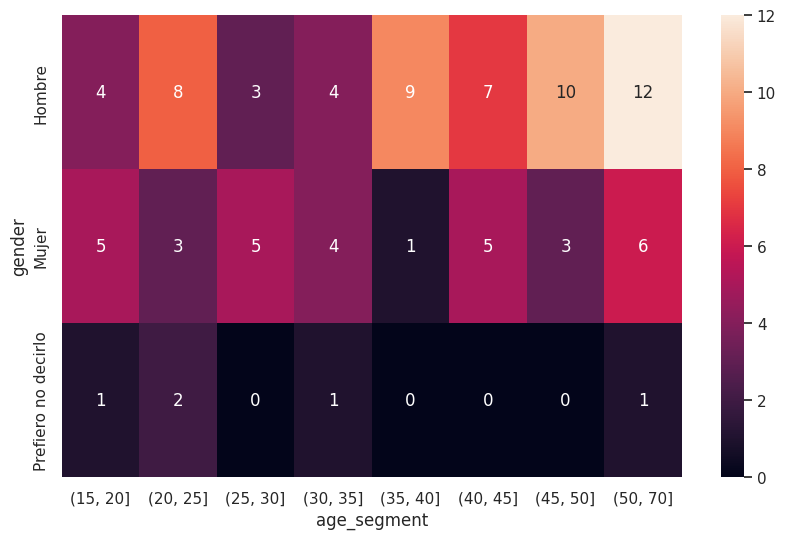

In [353]:
plt.figure(figsize=(10,6))
exp = pandas.crosstab(dataset.gender, dataset.age_segment)
seaborn.heatmap(exp, annot=True)

## Jointplots

En caso de que querramos estimar la correlación entre variables que sean numéricas, también se puede usar el `seaborn.jointplot`, pero no siempre logra un resultado interpretable.

Volvamos al ejemplo de la estimación de salarios con respecto a la edad de la persona. Haremos un jointplot con *kind=ked* y *kind=hex*. Con ambos gráficos podemos ver mejor las distribuciones que con el regplot, ya que los puntos individuales son agregados en una función de calor. Sin embargo, sucede lo mismo que con los heatmaps: no podemos asegurar que la concentración de valores conjuntos no sea sólo producto de los valores más frecuentes de cada distribución independiente.

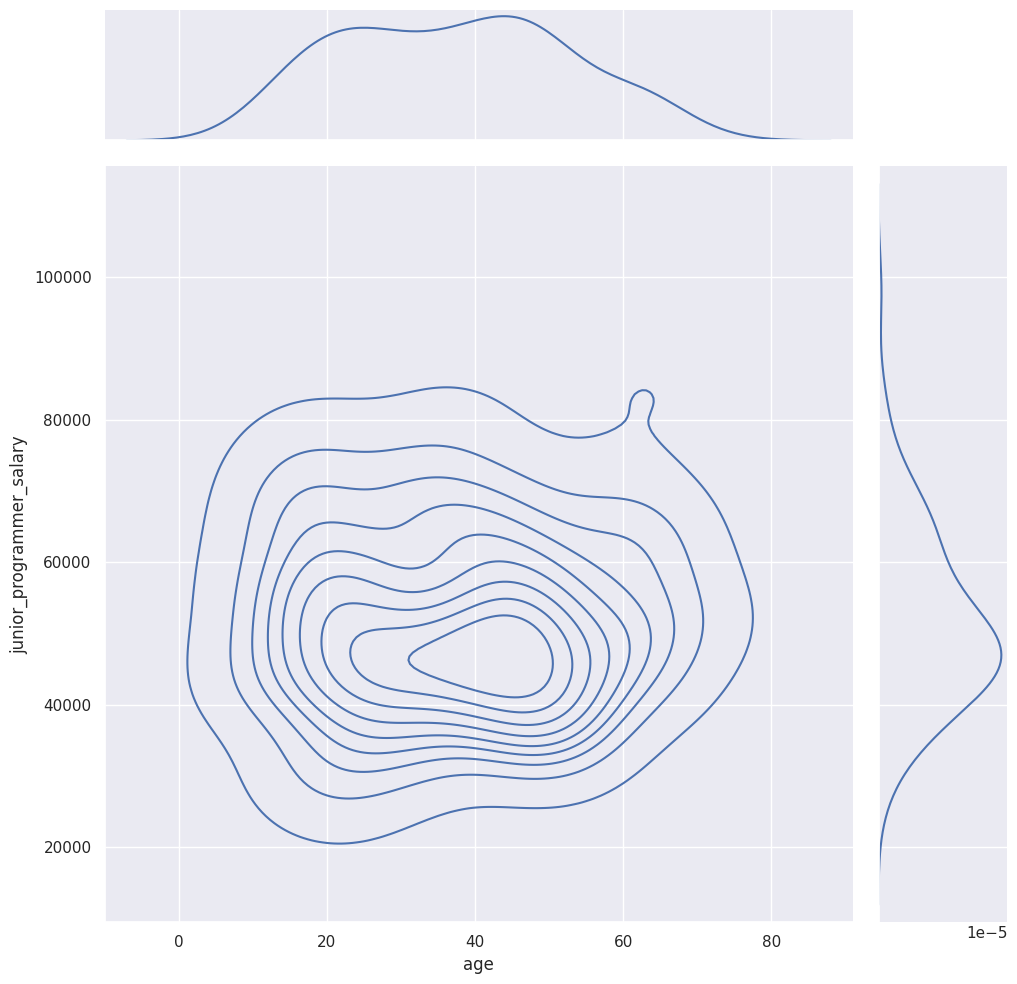

In [354]:
seaborn.jointplot(data=dataset, x='age',
                  y='junior_programmer_salary', kind='kde', height=10)

<Figure size 1500x600 with 0 Axes>

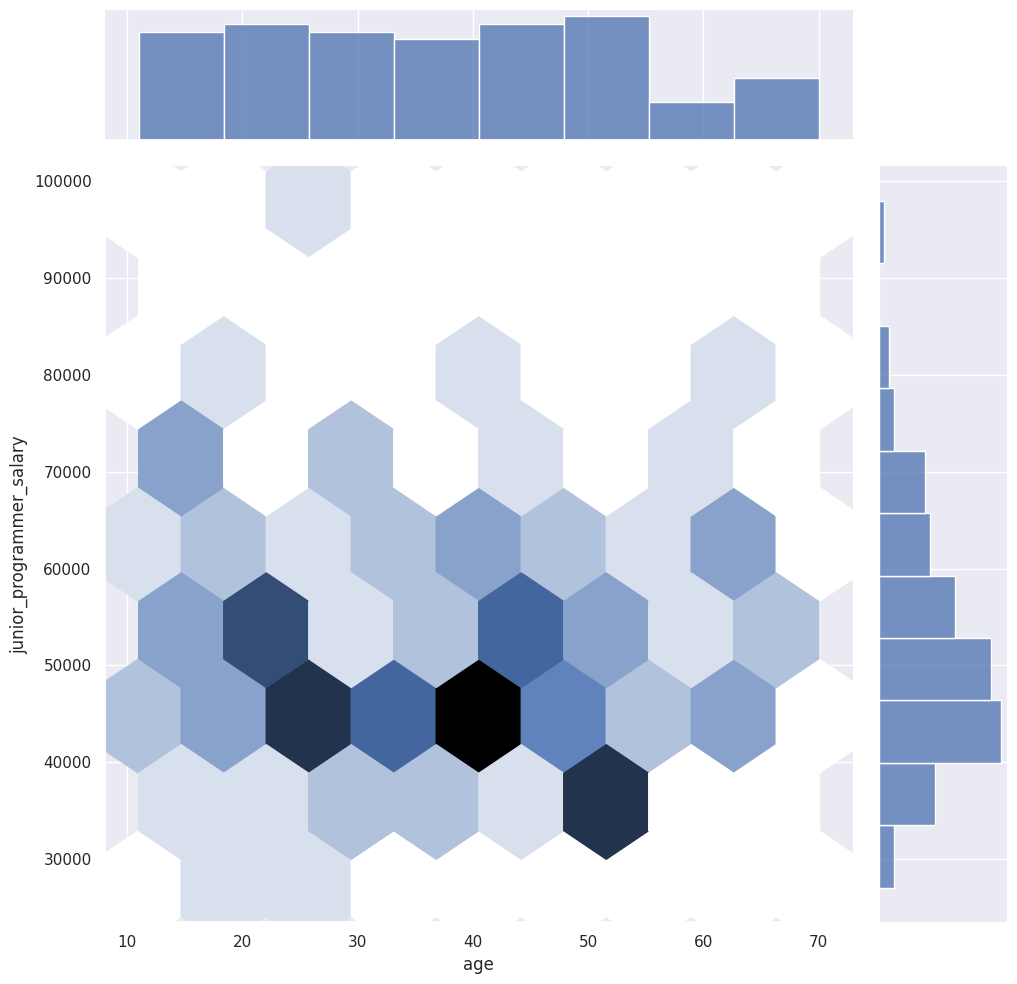

In [297]:
fig = plt.figure(figsize=(15,6))
seaborn.jointplot(data=dataset, x='age',
                  y='junior_programmer_salary', kind='hex', height=10)

## Pairplots

Los pairplots son muy útiles para comparar muchas variables numéricas al mismo tiempo. Por ejemplo, se puede hacer una comparación entre la edad y ambas estimaciones de sueldo.

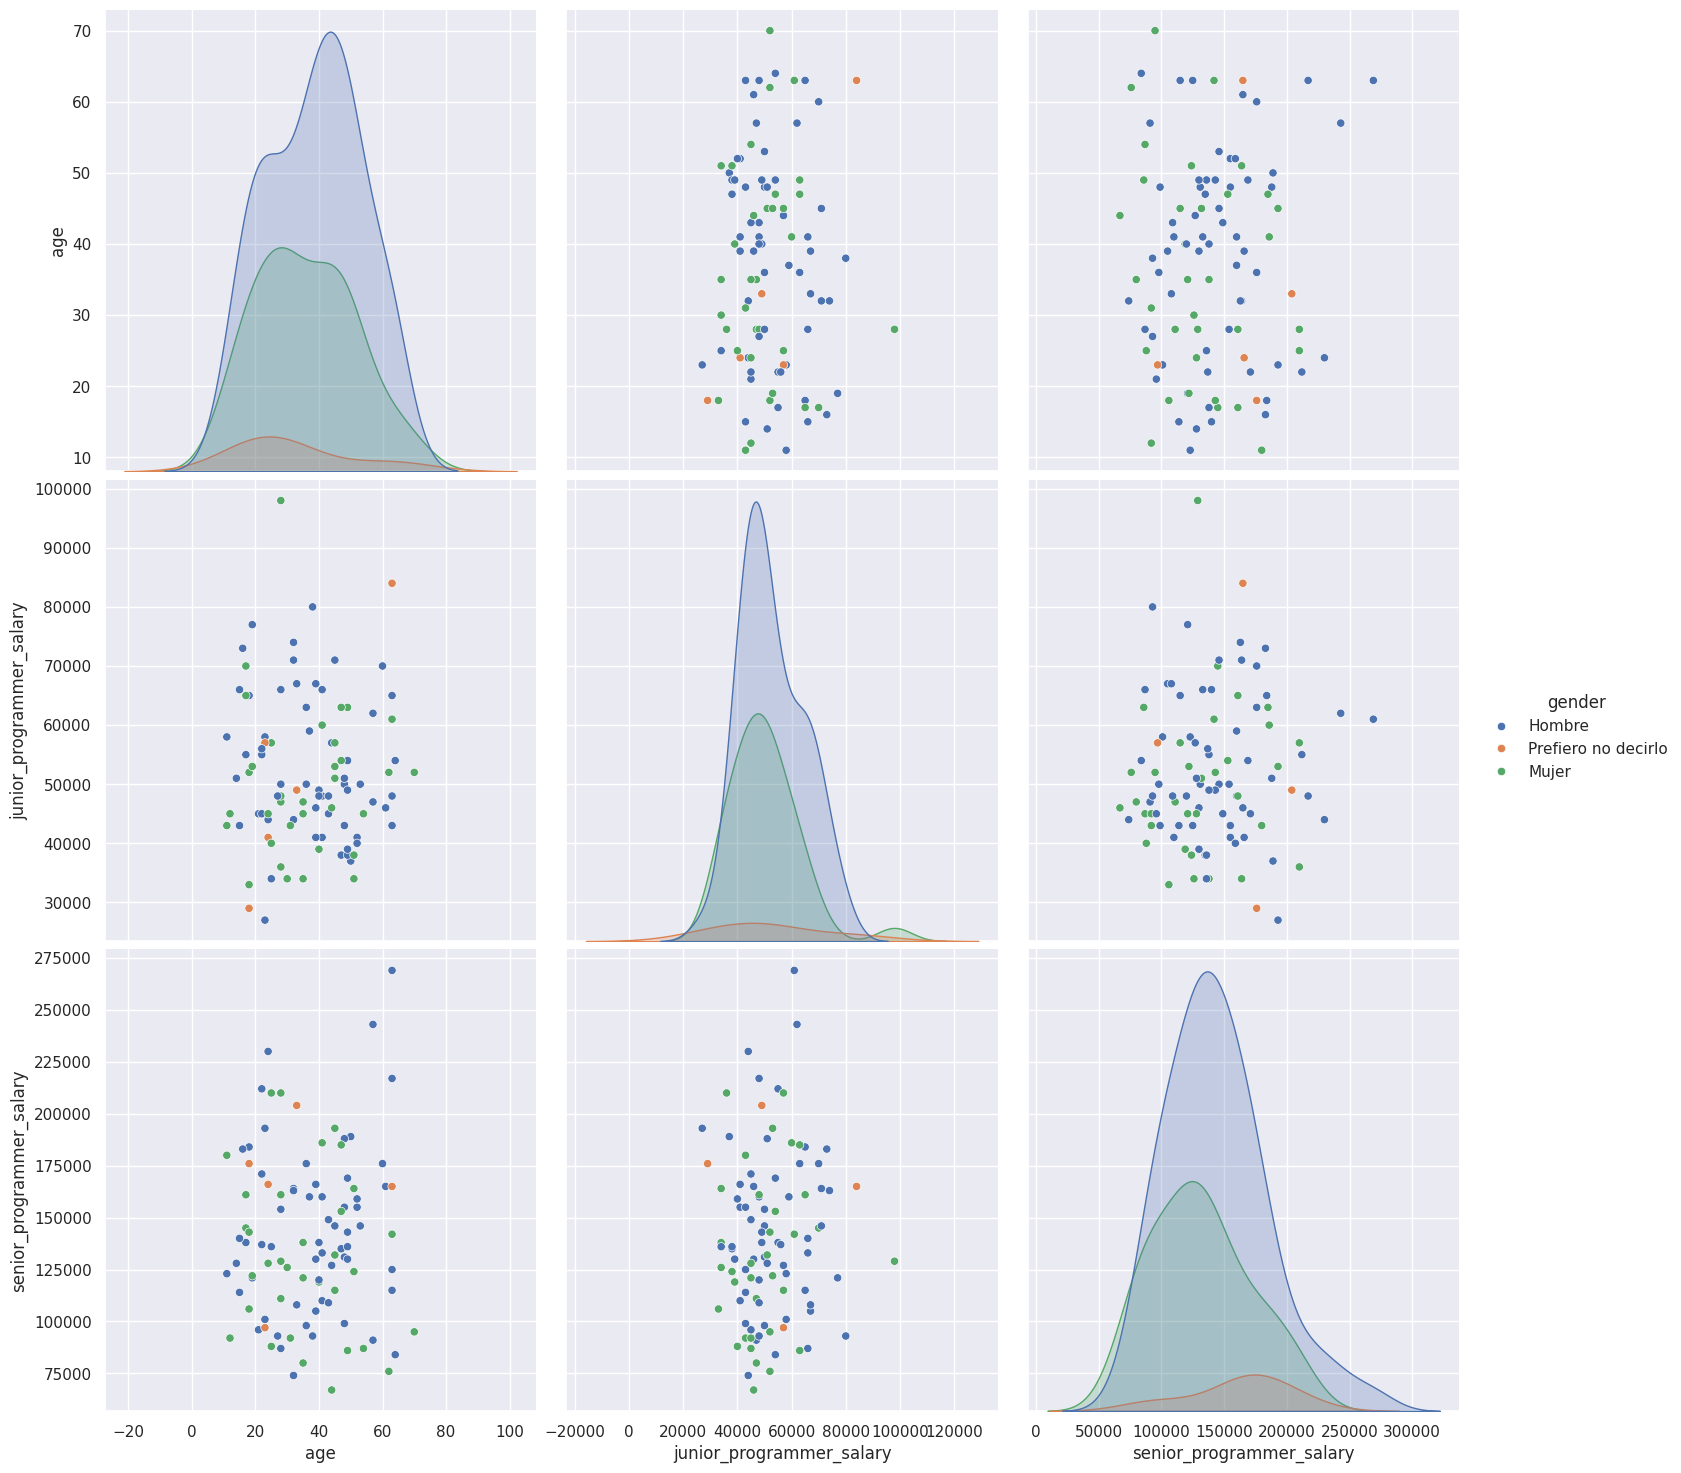

In [298]:
# @title
## TODO: maybe remove outliers
seaborn.pairplot(
    data=dataset,
    vars=['age', 'junior_programmer_salary', 'senior_programmer_salary'],
    hue='gender', height=5)

# Preguntas y Respuestas del trabajo
2. Calcula medidas de posición y dispersión para la columna age.
3. Utilice la función value_counts de pandas para calcular la probabilidad en lugar de la frecuencia de todos las respuestas posibles de la columna ´zodiac_sign´.
4. Describa el tipo de cada variable aleatoria y responda

- `gender`: ??
- `age`: ??
- `zodiac_sign`: ??
- `profession`: ??
- `junior_programmer_salary`: ??
- `senior_programmer_salary`: ??:

  a. La variable `age`, ¿es discreta o continua?

  b. ¿Qué valores pueden tomar `junior_programmer_salary` y `senior_programmer_salary`?

  c. Los signos del zodiaco siguen un orden (al igual que los días y los meses del año). ¿Podríamos decir que `zodiac_sign` tiene tipo ordinal?

5. Usando los boxplots describa la distribución del ingreso senior en el rango de edad construido y agrupado por ´gender´ . ¿Son simétricas, sesgada a la izquierda o a la derecha?


# Nota: En el ejercicio 1 tambien se encontraban lo siguiente:

*   Limpiar el gráfico anterior para hacerlo más legible. Por ejemplo, agregar título y etiquetas, remover los outliers, agrandar el tamaño, cambiar el color. etc.
*   Experimentar con distintos valores para el parámetro bins. ¿Cuál es el valor por defecto? ¿Qué sucede cuando es muy bajo? ¿Y cuando es muy alto?

*   ¿A qué distribuciones de las vistas en clase se parece más cada histograma? ¿Son distintas? ¿Qué las diferencia?

Asi que para dejar todas las respuestas juntas, dejare a continuacion:


# 1.


Asi que aqui dejo las respuestas del ejercicio 1:


¿Cuál es el valor por defecto?
Creo que su valor por defecto es:
*   Número de bins para Junior: 11
*   Número de bins para Senior: 8

¿Qué sucede cuando es muy bajo?

Cuando el valor de los bins es muy bajo, el histograma se vuelve muy general, ya que agrupa demasiados datos en pocos bins. Esto hace que no se vea la distribución detallada de los datos y se pierdan detalles importantes, creando un gráfico que no refleja adecuadamente la variabilidad de la información.

¿Y cuando es muy alto?

Cuando el número de bins es muy alto, el histograma se vuelve muy detallado. En este caso, se pueden observar incluso pequeñas fluctuaciones y diferencias entre los datos. Sin embargo, esto también puede resultar en un gráfico ruidoso, con demasiados detalles que dificultan la identificación de patrones generales y pueden hacer que se sobreinterpreten los datos.

¿A qué distribuciones de las vistas en clase se parece más cada histograma?

Las distribuciones que se parecen más, son a una distribución normal , pero con una dispersión más grande en el caso de senior.
Aunque en el caso de los salarios Junior, la distribución se asemeja, aunque de manera débil, a una distribución sesgada a la derecha.

¿Son distintas?:

Sí, las distribuciones son distintas, debido a las diferencias en el rango y la dispersión de los salarios.

¿Qué las diferencia?:

Diferencia en el rango de salarios, dispersión y concentración de datos en los distintos segmentos salariales. Los salarios Junior son más concentrados en valores más bajos, mientras que los Senior tienen un rango más amplio y pueden estar más distribuidos.


# 2.

Medidas de posición y dispersión:

In [299]:
import pandas as pd

print('MEDIDAS DE POSICIÓN:')
media_age = dataset.age.mean()
print('media =', media_age)
print('mediana =', dataset.age.median())

Q_1_age = dataset.age.quantile(0.25) #primer cuartil
print('Q_1 =', Q_1_age)

print('Q_2 o mediana =', dataset.age.quantile(0.5)) #otra forma de calcular la mediana

Q_3_age = dataset.age.quantile(0.75)  #tercer cuartil
print('Q_3 =', Q_3_age)

print('--------------')
print('MEDIDAS DE DISPERSIÓN:')
print('Rango=(max-min) =', dataset.age.max() - dataset.age.min())

desviacion_age = dataset.age.std() #desviación estandar
print('Desviación estándar =', desviacion_age)

print('Varianza =', dataset.age.var())

RIC_age = Q_3_age - Q_1_age #rango intercuartil
print('RIC =', RIC_age)

CV_age = round((desviacion_age / media_age) * 100, 2)  #redondea 2 decimales
print('CV =', CV_age, '%')



MEDIDAS DE POSICIÓN:
media = 37.33
mediana = 38.5
Q_1 = 24.0
Q_2 o mediana = 38.5
Q_3 = 48.25
--------------
MEDIDAS DE DISPERSIÓN:
Rango=(max-min) = 59
Desviación estándar = 15.055489954756633
Varianza = 226.66777777777784
RIC = 24.25
CV = 40.33 %


# 3.

Función value_counts de pandas para calcular la probabilidad en lugar de la frecuencia de todos las respuestas posibles de la columna ´zodiac_sign´.

In [300]:
'zodiac_sign' in df.columns
probabilidad_zodiac_sign = df['zodiac_sign'].value_counts(normalize=True)
print("Probabilidades de los signos zodiacales:")
print(probabilidad_zodiac_sign)

Probabilidades de los signos zodiacales:
zodiac_sign
Escorpio       0.12
Cáncer         0.10
Sagitario      0.10
Tauro          0.09
Capricornio    0.09
Libra          0.09
Virgo          0.08
Leo            0.08
Acuario        0.08
Aries          0.07
Picis          0.05
Géminis        0.05
Name: proportion, dtype: float64


# 4.


*   Descripción del tipo de cada variable aleatoria:

gender:Categórica nominal.
(Tiene las categorías: "Hombre", "Mujer", "Prefiero no decirlo", sin ningún orden o jerarquía entre ellas)

age:Cuantitativa discreta.
La variable age representa la edad, que puede tomar cualquier valor numérico en un rango discreta si bien como puede tener numeros con coma, pudiendo asi considerar la variable como continua, al solo presentar enteros, creo que es mas discreta que continua en este caso.

zodiac_sign:Categórica nominal pero no considera el orden.
Aunque los signos zodiacales tienen un orden temporal, no tienen una relación cuantitativa directa. Sin embargo, se podrian considerar como ordinales, pero en este caso, no hay una relacion de orden en la cual se este implicando su uso.

profession:Categórica nominal.
(La variable profession tiene categorías sin un orden)

junior_programmer_salary:Cuantitativa continua.
(Al epresentar un salario, que es un valor numérico continuo que puede tomar cualquier valor)

senior_programmer_salary: Cuantitativa continua.
(Al también representar un salario, que es una variable numérica continua)

*   Respuestas a las preguntas específicas:

a. ¿La variable age es discreta o continua?
La variable age es continua. Pero como la edad puede tomar cualquier valor dentro de un rango y puede tener decimales. En la práctica, se puede redondear, pero conceptualmente es una variable continua. (Si bien antes la considere discreta, es continua pero en si depende del caso en particular y como se use)

b.¿Qué valores pueden tomar junior_programmer_salary y senior_programmer_salary?

Al ser variables cuantitativas continuas y pueden tomar cualquier valor, pero suelen estar dentro de un rango (Que suele ser definido por la economia) y pueden ser números decimales.

c. Los signos del zodiaco siguen un orden (al igual que los días y los meses del año). ¿Podríamos decir que zodiac_sign tiene tipo ordinal?

Ya que aunque los signos zodiacales tienen un orden, no es un orden con una diferencia cuantitativa entre ellos, es más una secuencia cíclica. Por lo tanto, en el sentido estricto, no serían una variable ordinal, aunque en algunas situaciones podrían tratarse como ordinales debido a su orden cronológico o de aparición. Dependeria de la situacion pero en si, serian categóricos nominales.

# 5.

Usando los boxplots describa la distribución del ingreso senior en el rango de edad construido y agrupado por ´gender´ . ¿Son simétricas, sesgada a la izquierda o a la derecha?

  Como son varios boxplot, para saber si son: simétricos, sesgados a la izquierda o a la derecha. Dependerá de cada uno en particular, ya que cada uno tiene sus propios los cuartiles y distribuciones.

*   Distribución simétrica:
Si los extremos de la caja son equidistantes con respecto a la mediana,esta sería una distribución simétrica.

*   Distribución sesgada a la derecha: Si el extremo superior es más largo que el extremo inferior, y la mediana está más cerca del Q1, la distribución está sesgada a la derecha.

*   Distribución sesgada a la izquierda: Si el extremo inferior es más largo que el extremo superior, y la mediana está más cerca del Q3, por lo que la distribución está sesgada a la izquierda.


Index(['Unnamed: 0', 'gender', 'age', 'zodiac_sign', 'profession',
       'junior_programmer_salary', 'senior_programmer_salary'],
      dtype='object')
Index(['timestamp', 'gender', 'age', 'zodiac_sign', 'profession',
       'junior_programmer_salary', 'senior_programmer_salary', 'age_segment'],
      dtype='object')


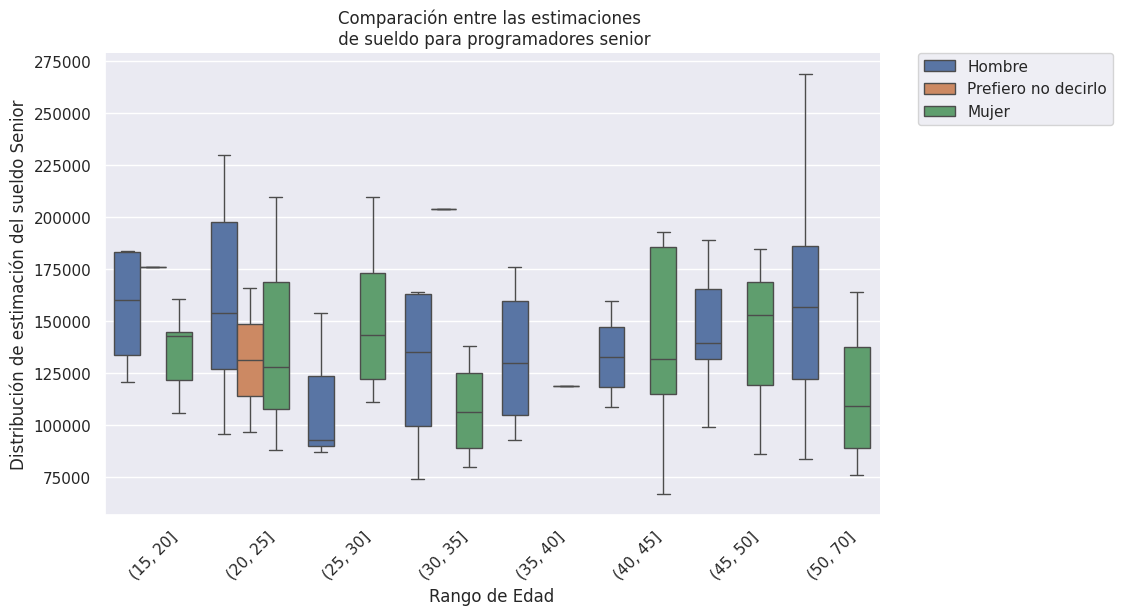

In [301]:
import matplotlib.pyplot as plt
import seaborn as sns

print(df.columns)
print(age_data.columns)

plt.figure(figsize=(10, 6))
sns.boxplot(data=age_data, x='age_segment', y='senior_programmer_salary', hue='gender')

plt.ylabel('Distribución de estimación del sueldo Senior')
plt.xlabel('Rango de Edad')
plt.title('Comparación entre las estimaciones \n de sueldo para programadores senior')

plt.xticks(rotation=45)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

sns.despine()

plt.show()




